# Market Segmentation using Autoencoders

## Import Libraries dan Dataset

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [221]:
# kita akan melakukan mounting di google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
df = pd.read_csv('/content/drive/MyDrive/Data Portofolio/Marketing_data.csv')

In [223]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


dapat dilihat bahwa ada 18 fitur dengan 8950 baris

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [225]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


disini kita bisa lihat bahwa ada yang made one purchase sebesar 40761.25

In [226]:
df[df['ONEOFF_PURCHASES']==40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [227]:
# kita ingin melihat siapa yang memiliki cash advance tertinggi
df['CASH_ADVANCE'].max()

47137.21176

In [228]:
df[df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Visualisasi Dataset

<Axes: >

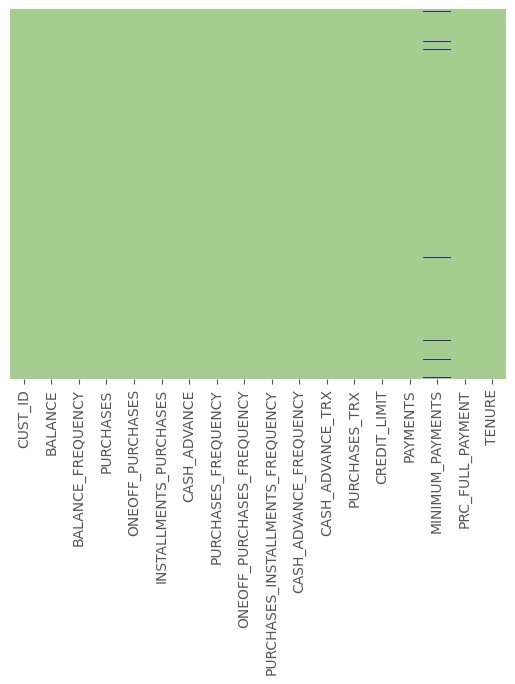

In [229]:
# kita akan melihat apakah ada missing data
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'crest')

terdapat sedikit missing data yang perlu kita tangani , kita harus melihatnya dengan lebih jelas

In [230]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [231]:
# kita akan mengisi missing value kedua kolom dengan mean
df.loc[df['MINIMUM_PAYMENTS'].isnull()==True, 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [232]:
df.loc[df['CREDIT_LIMIT'].isnull()==True, 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

<Axes: >

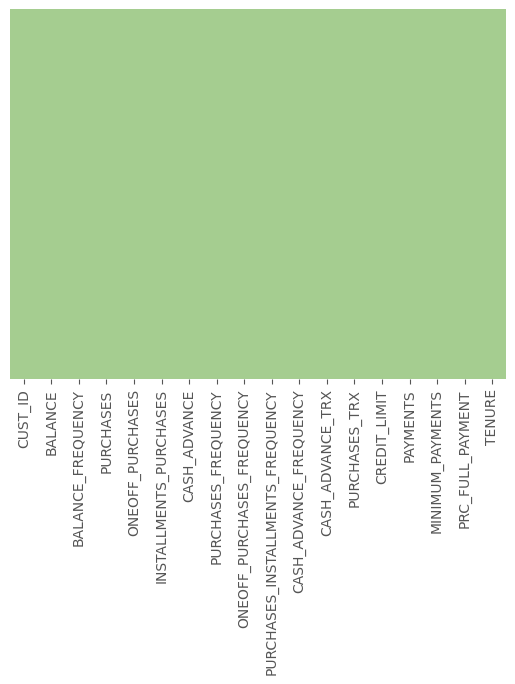

In [233]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'crest')

In [234]:
# mari kita lihat apakah ada baris duplikat dalam data
df.duplicated().sum()

np.int64(0)

In [235]:
# kita akan drop kolom customer id karena itu hanya tanda identitas
df.drop('CUST_ID', axis=1, inplace=True)

In [236]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


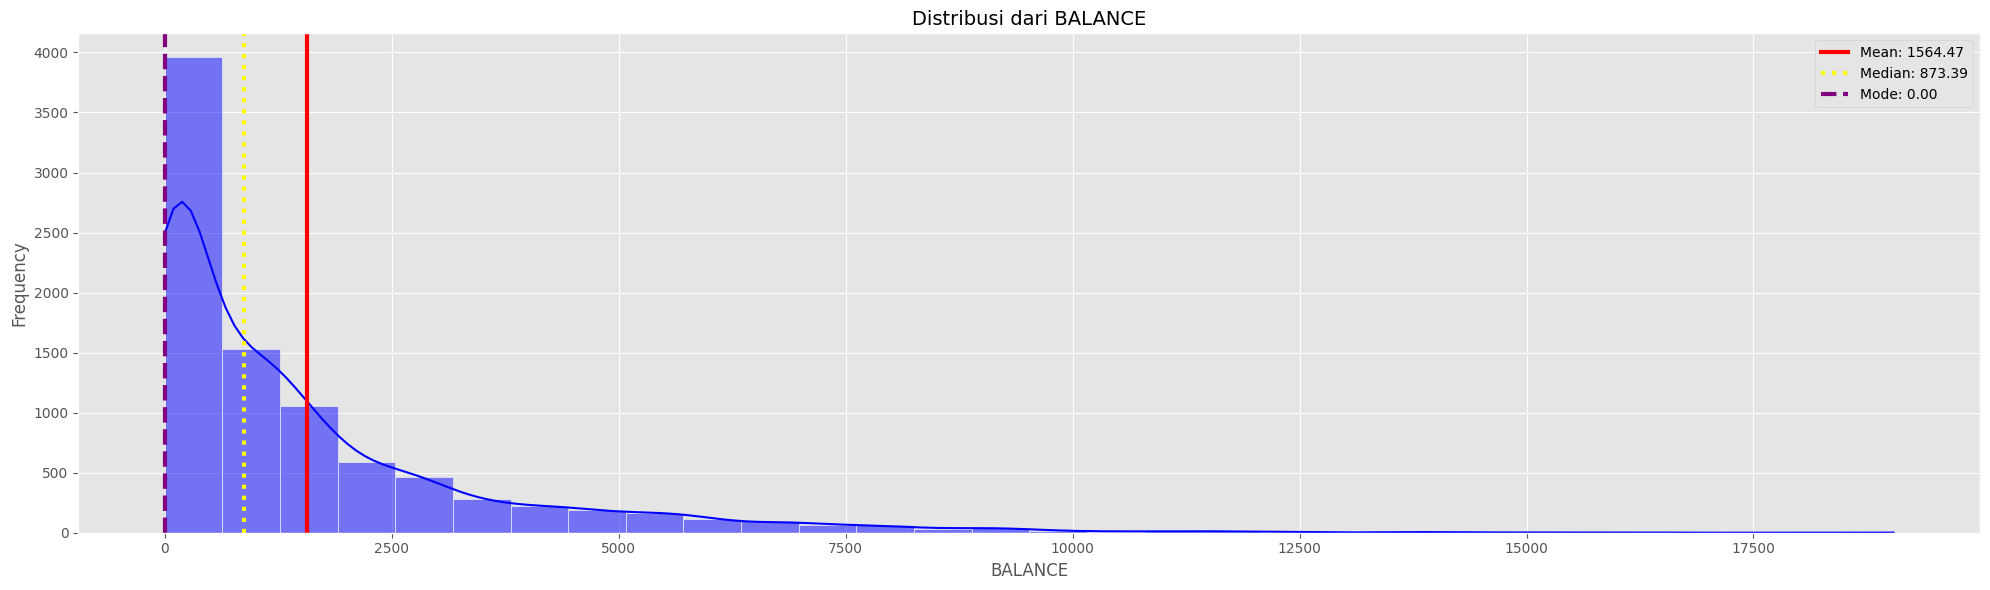

Ringkasan statistik dari BALANCE:
Rata-rata: 1564.47
Standar deviasi: 2081.53
Median: 873.39
Mode: 0.00
--------------------------------------------------


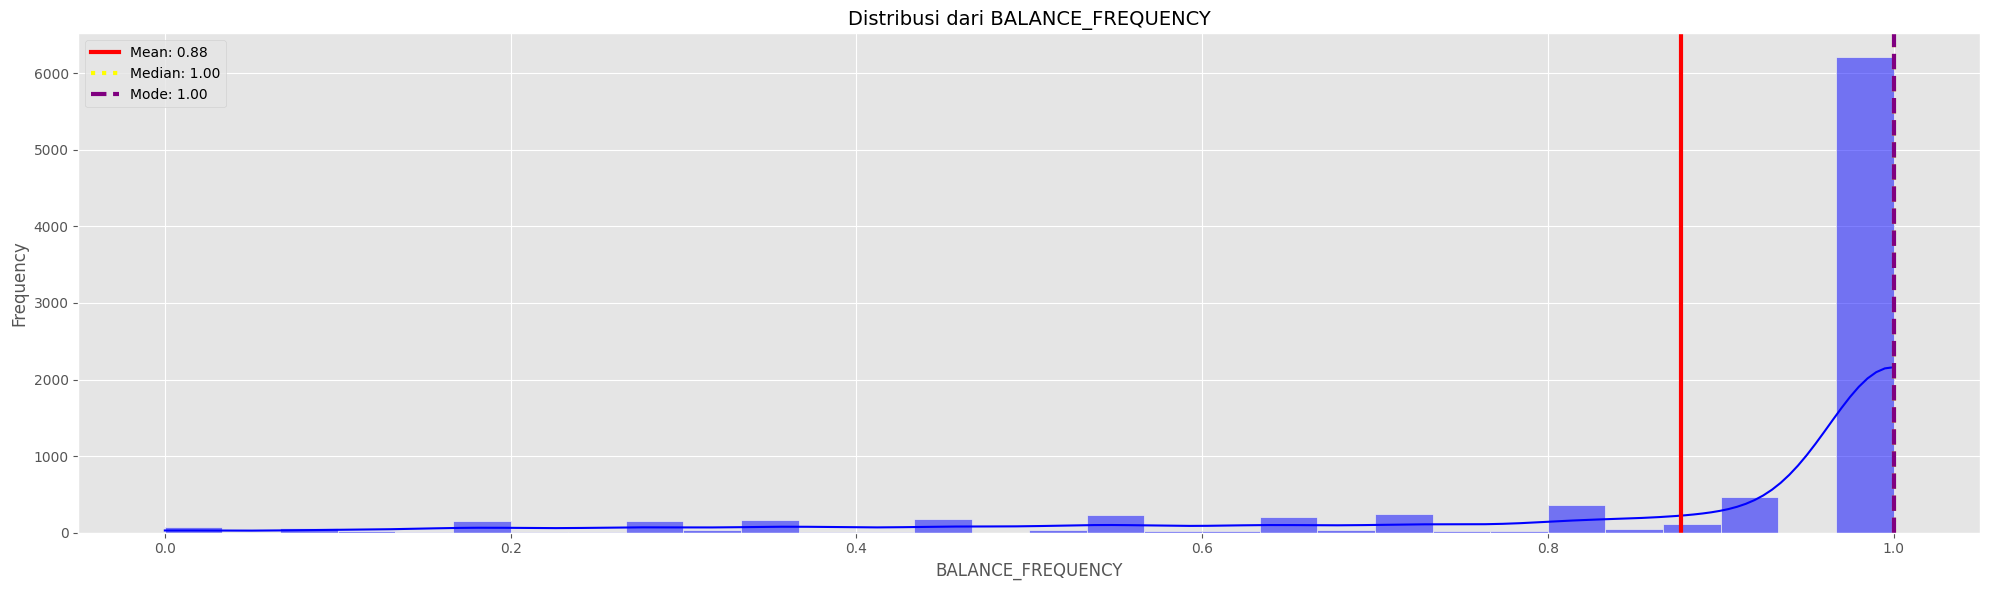

Ringkasan statistik dari BALANCE_FREQUENCY:
Rata-rata: 0.88
Standar deviasi: 0.24
Median: 1.00
Mode: 1.00
--------------------------------------------------


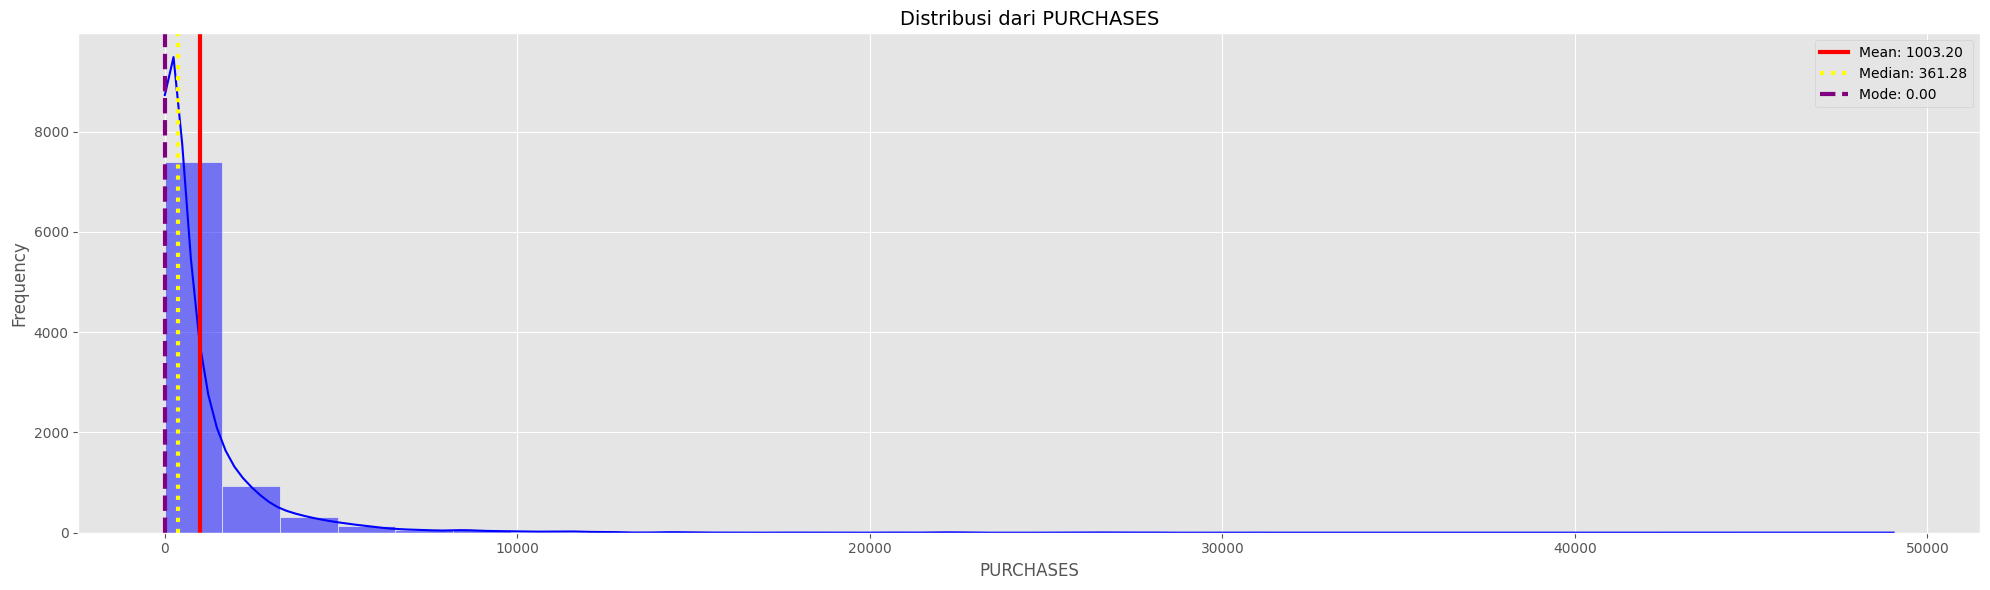

Ringkasan statistik dari PURCHASES:
Rata-rata: 1003.20
Standar deviasi: 2136.63
Median: 361.28
Mode: 0.00
--------------------------------------------------


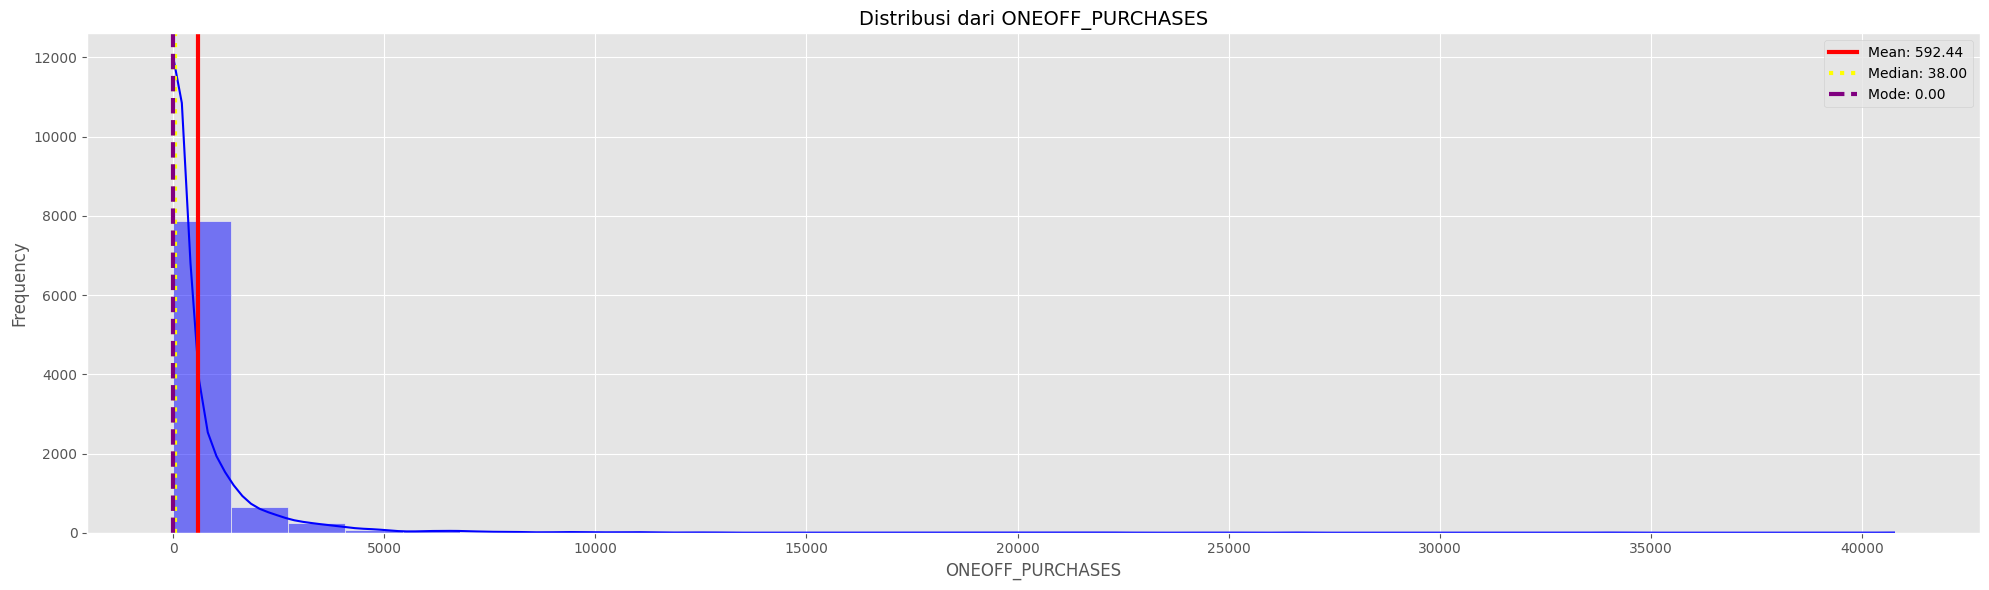

Ringkasan statistik dari ONEOFF_PURCHASES:
Rata-rata: 592.44
Standar deviasi: 1659.89
Median: 38.00
Mode: 0.00
--------------------------------------------------


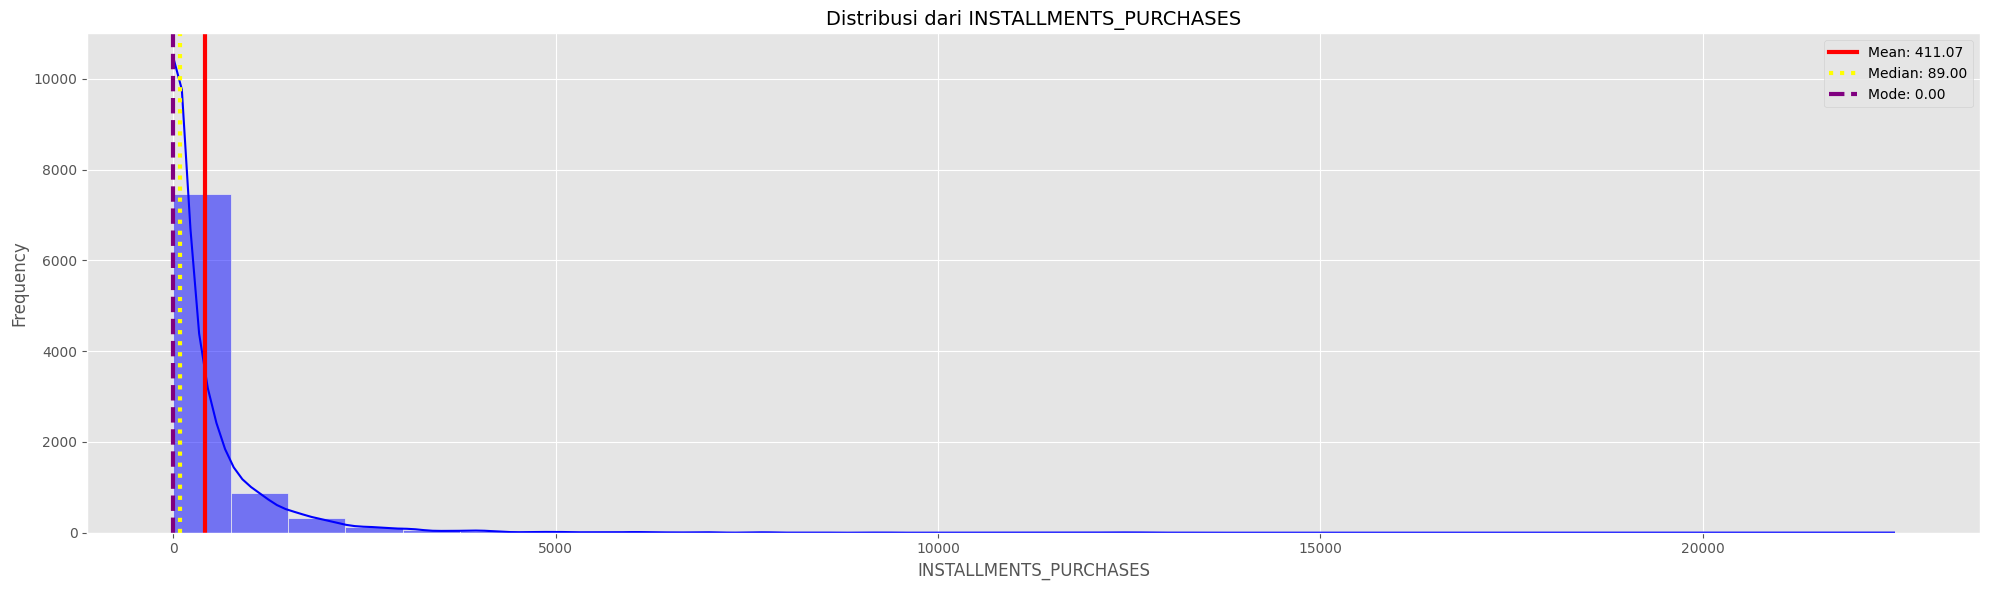

Ringkasan statistik dari INSTALLMENTS_PURCHASES:
Rata-rata: 411.07
Standar deviasi: 904.34
Median: 89.00
Mode: 0.00
--------------------------------------------------


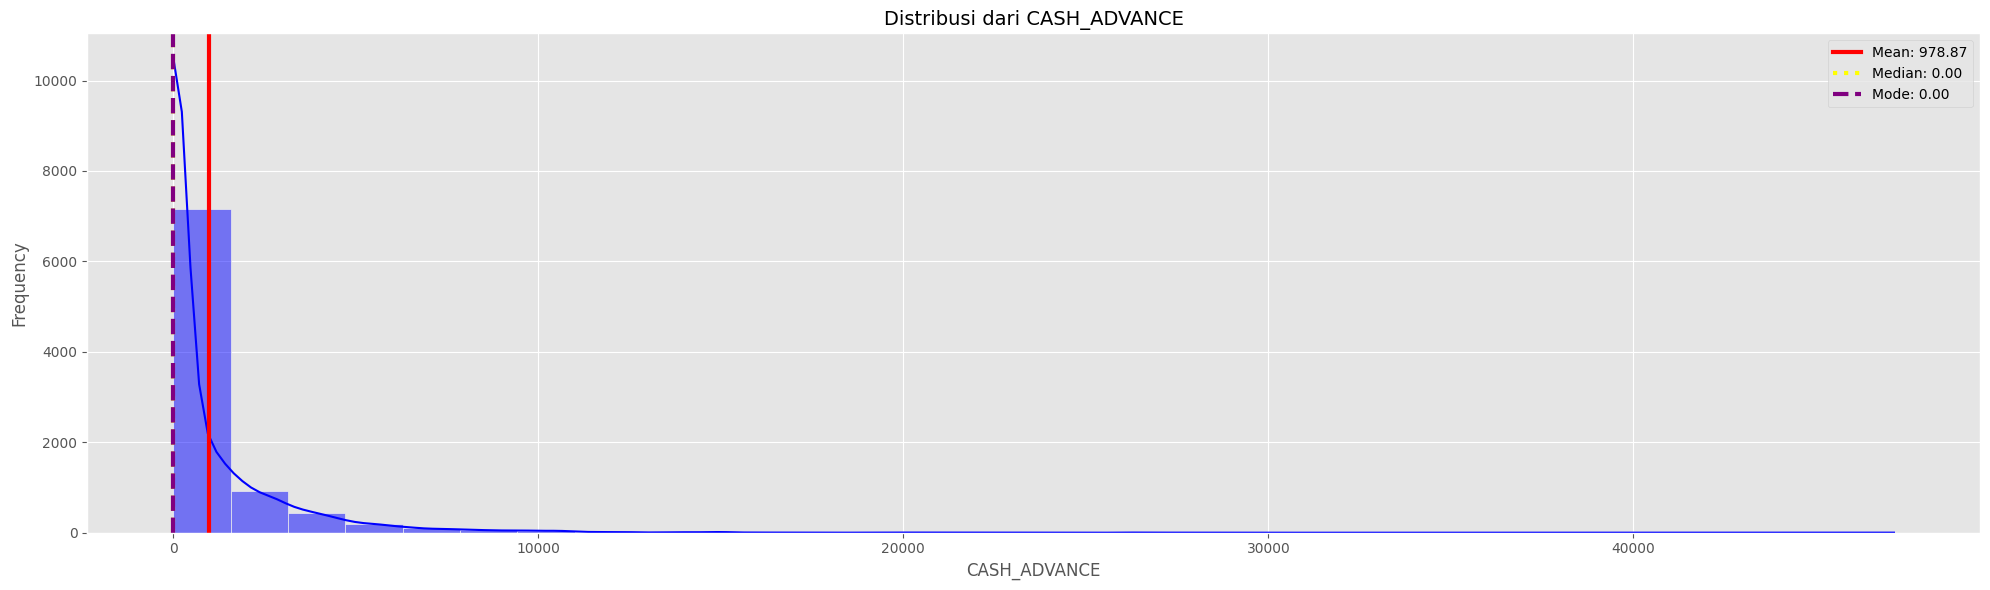

Ringkasan statistik dari CASH_ADVANCE:
Rata-rata: 978.87
Standar deviasi: 2097.16
Median: 0.00
Mode: 0.00
--------------------------------------------------


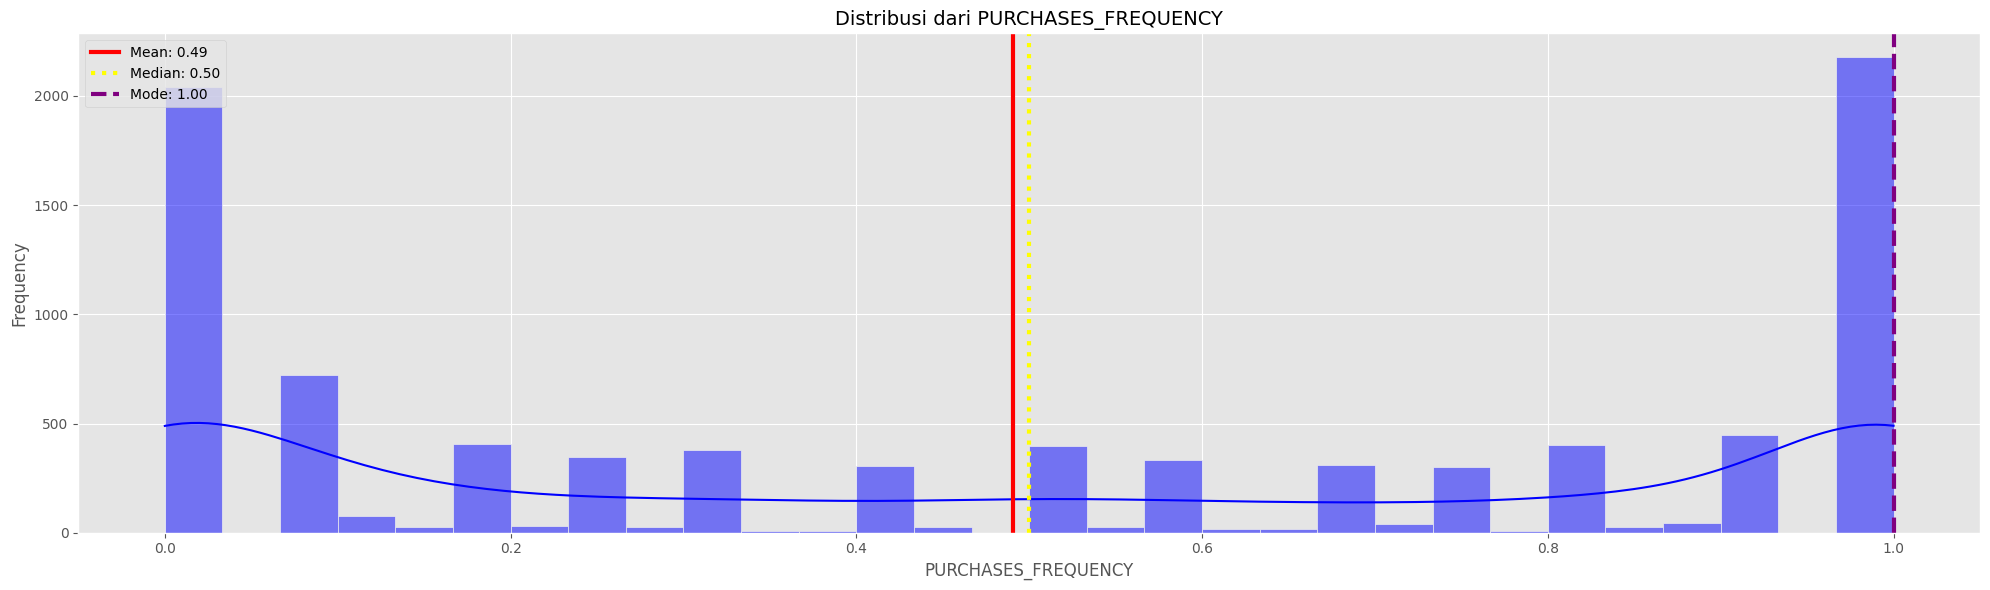

Ringkasan statistik dari PURCHASES_FREQUENCY:
Rata-rata: 0.49
Standar deviasi: 0.40
Median: 0.50
Mode: 1.00
--------------------------------------------------


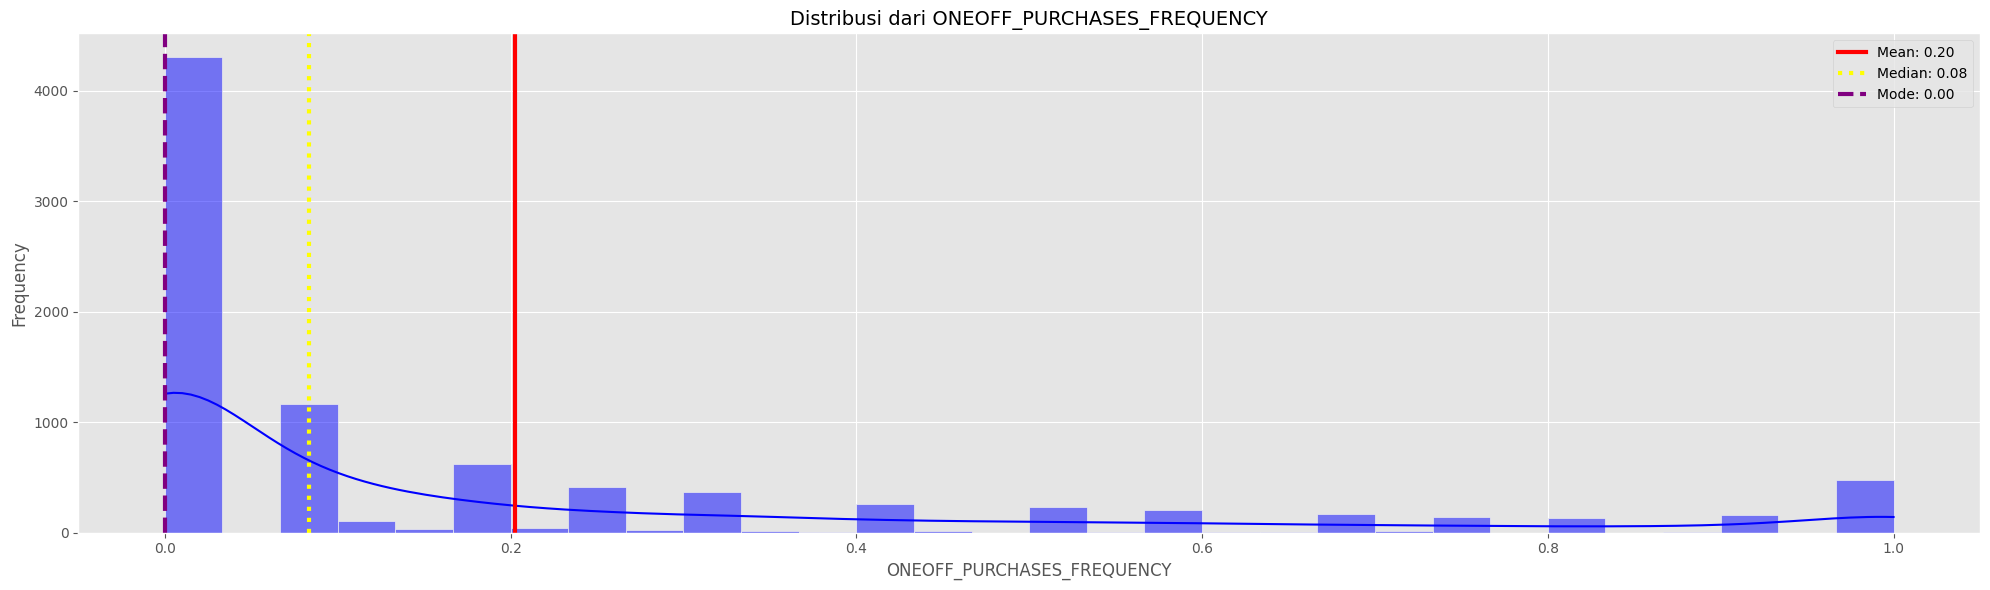

Ringkasan statistik dari ONEOFF_PURCHASES_FREQUENCY:
Rata-rata: 0.20
Standar deviasi: 0.30
Median: 0.08
Mode: 0.00
--------------------------------------------------


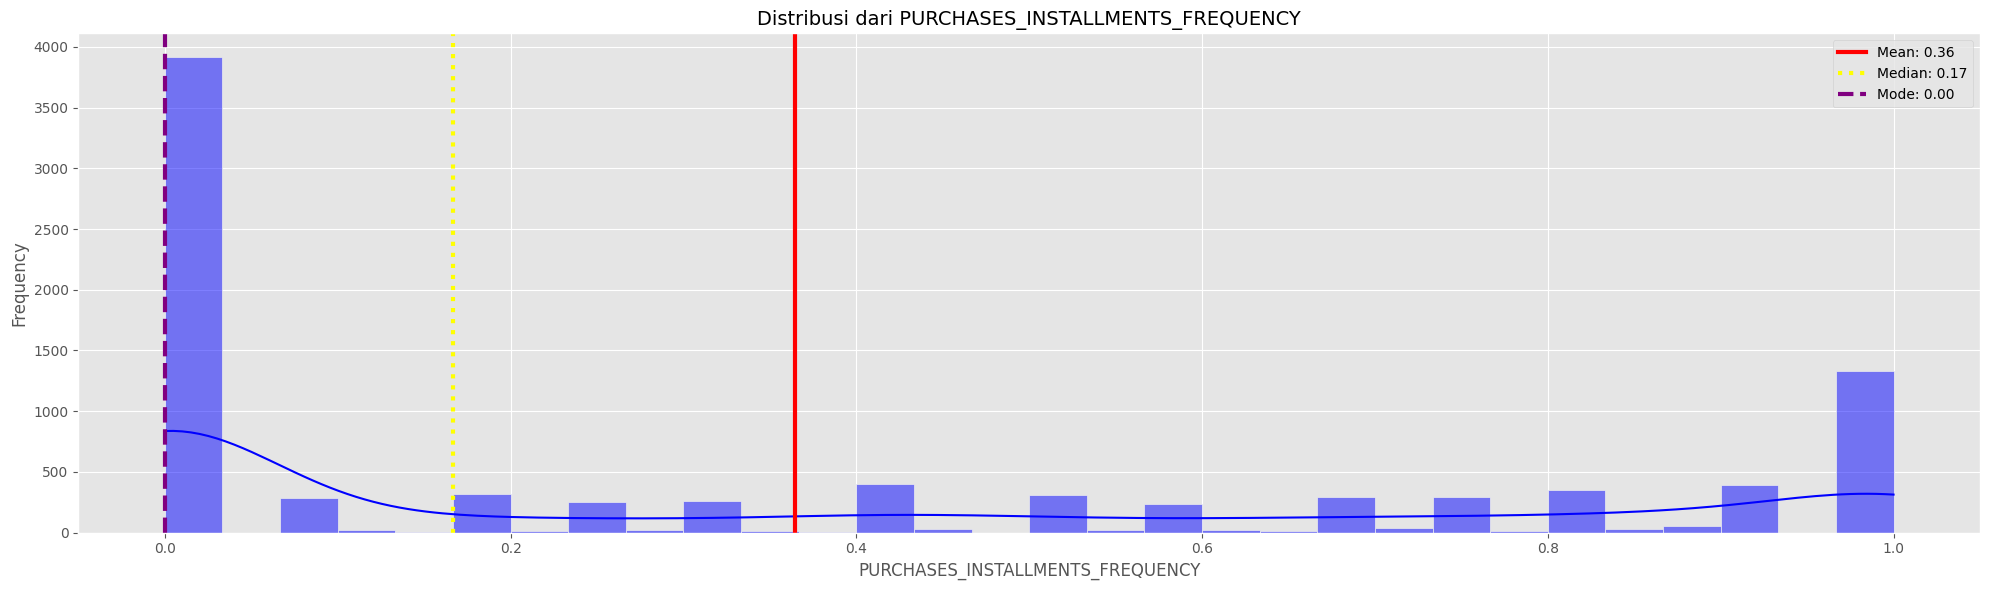

Ringkasan statistik dari PURCHASES_INSTALLMENTS_FREQUENCY:
Rata-rata: 0.36
Standar deviasi: 0.40
Median: 0.17
Mode: 0.00
--------------------------------------------------


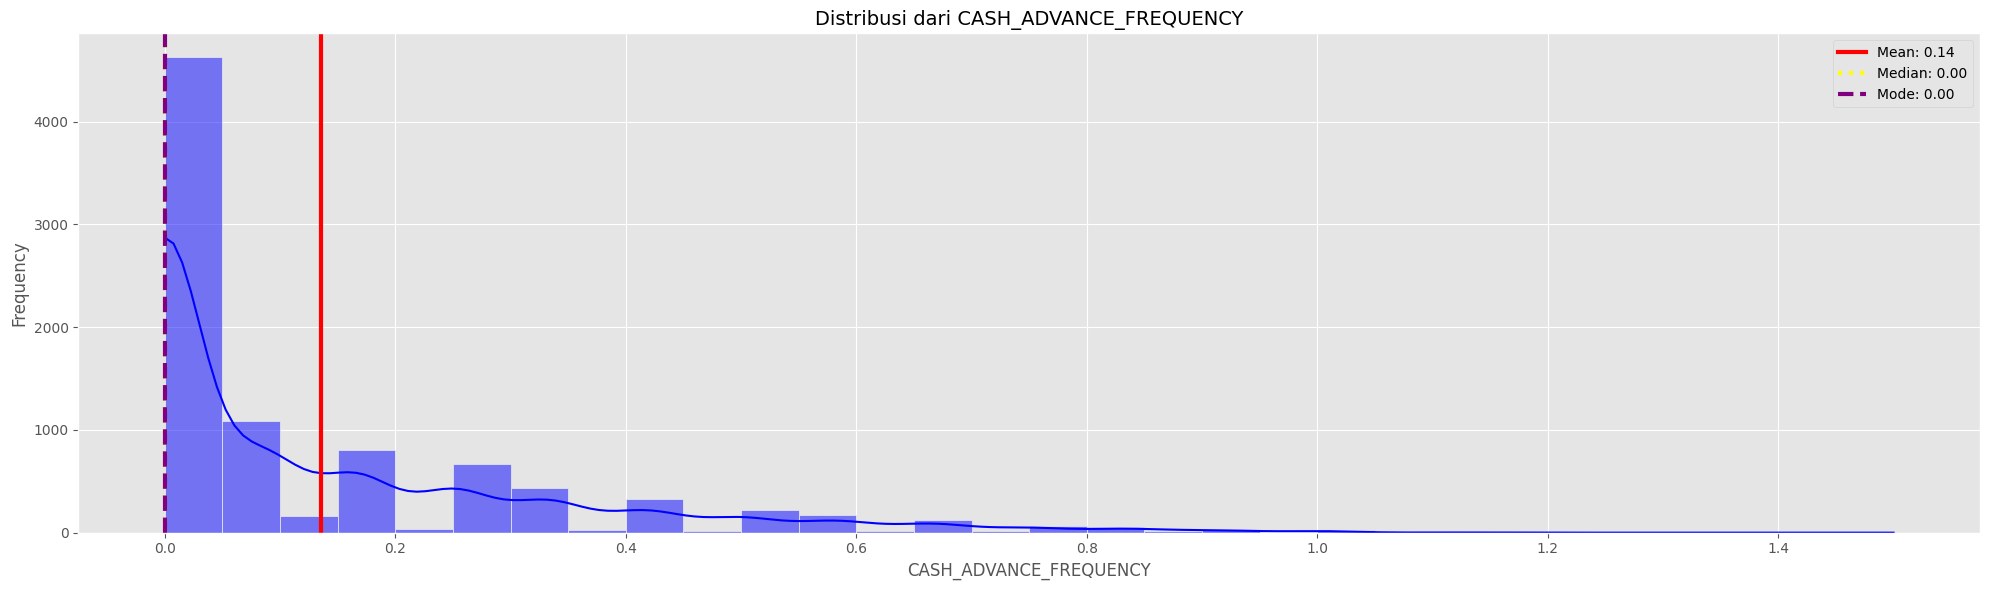

Ringkasan statistik dari CASH_ADVANCE_FREQUENCY:
Rata-rata: 0.14
Standar deviasi: 0.20
Median: 0.00
Mode: 0.00
--------------------------------------------------


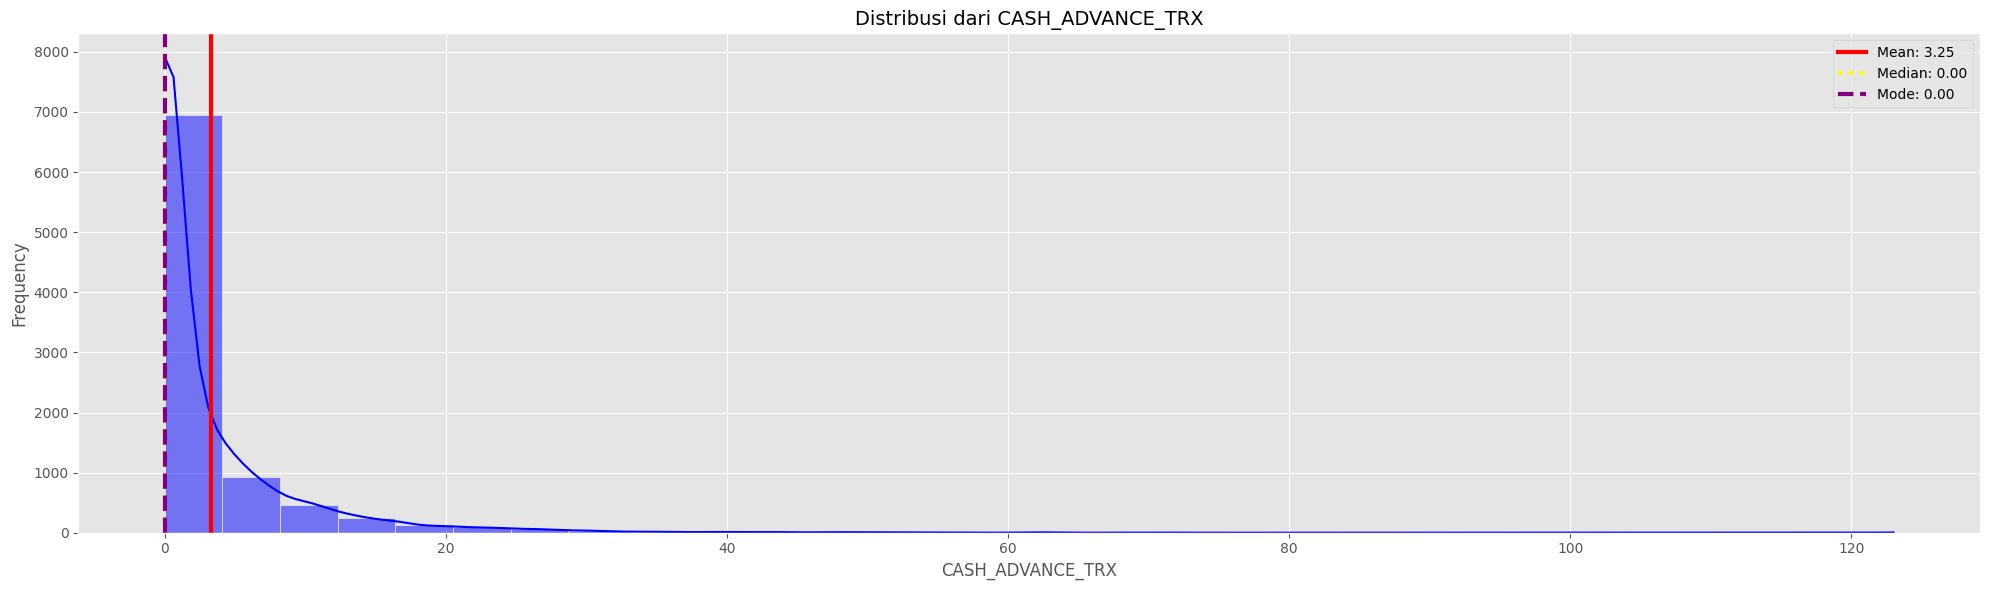

Ringkasan statistik dari CASH_ADVANCE_TRX:
Rata-rata: 3.25
Standar deviasi: 6.82
Median: 0.00
Mode: 0.00
--------------------------------------------------


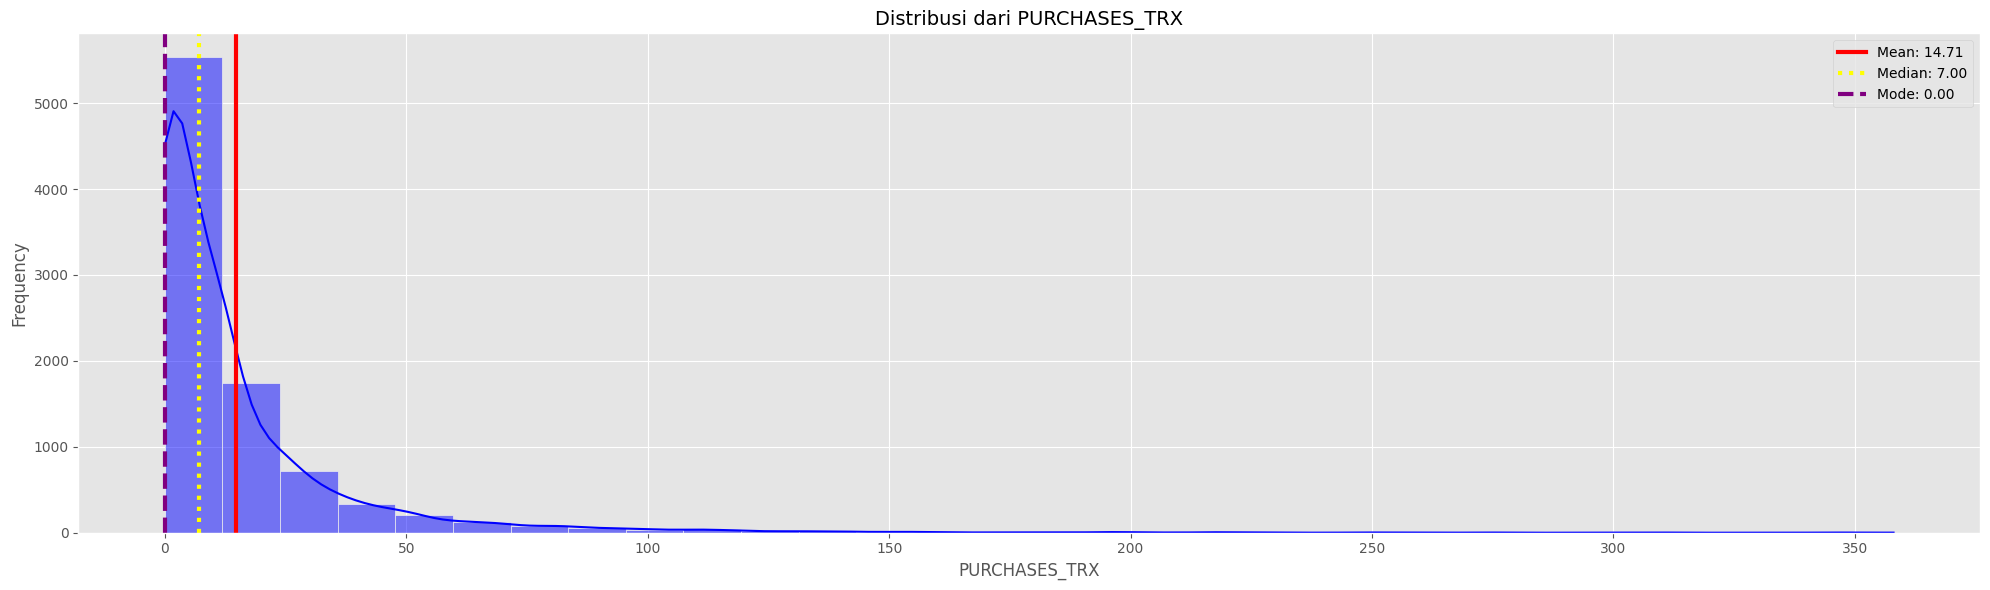

Ringkasan statistik dari PURCHASES_TRX:
Rata-rata: 14.71
Standar deviasi: 24.86
Median: 7.00
Mode: 0.00
--------------------------------------------------


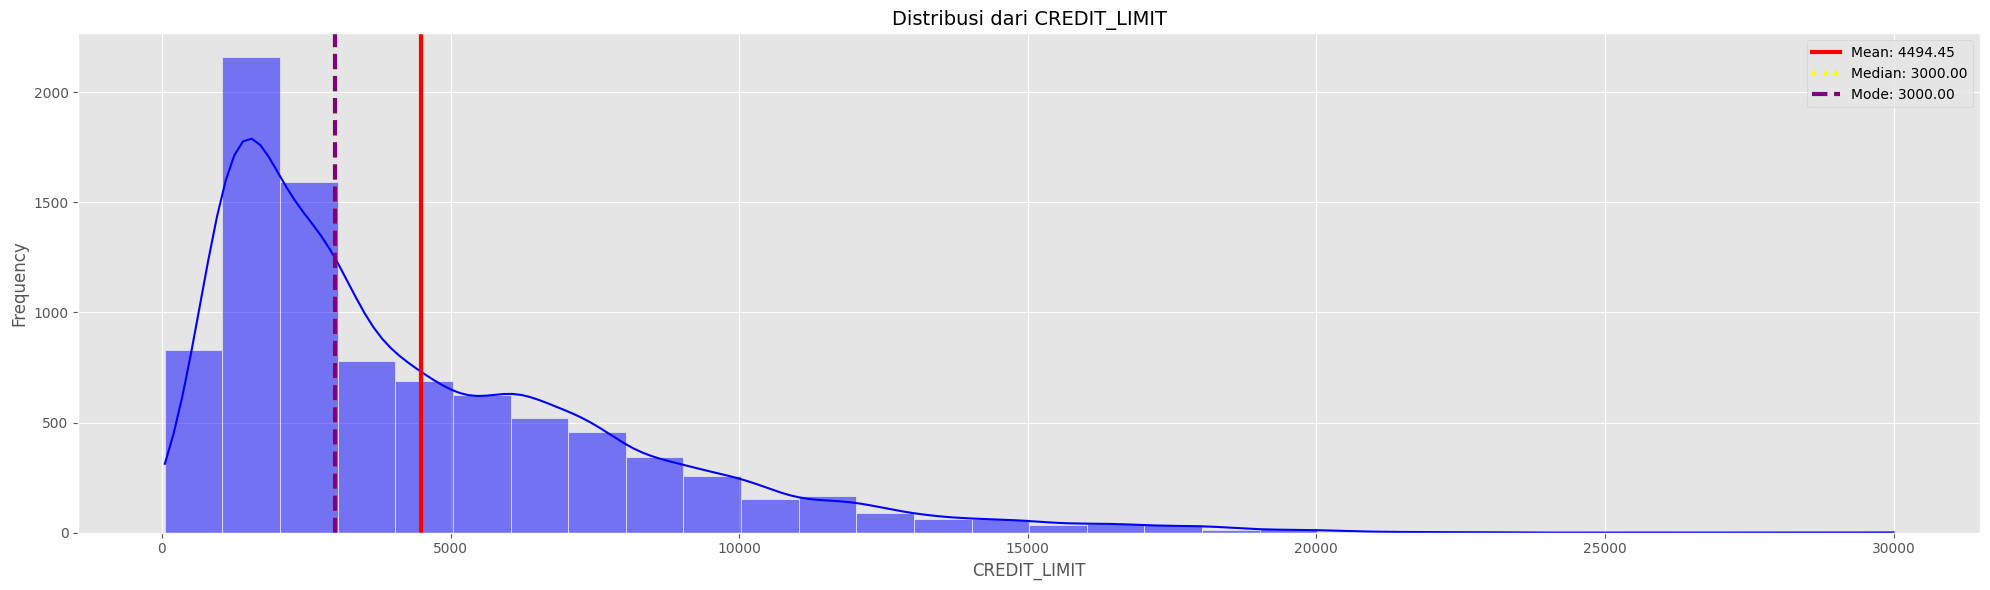

Ringkasan statistik dari CREDIT_LIMIT:
Rata-rata: 4494.45
Standar deviasi: 3638.61
Median: 3000.00
Mode: 3000.00
--------------------------------------------------


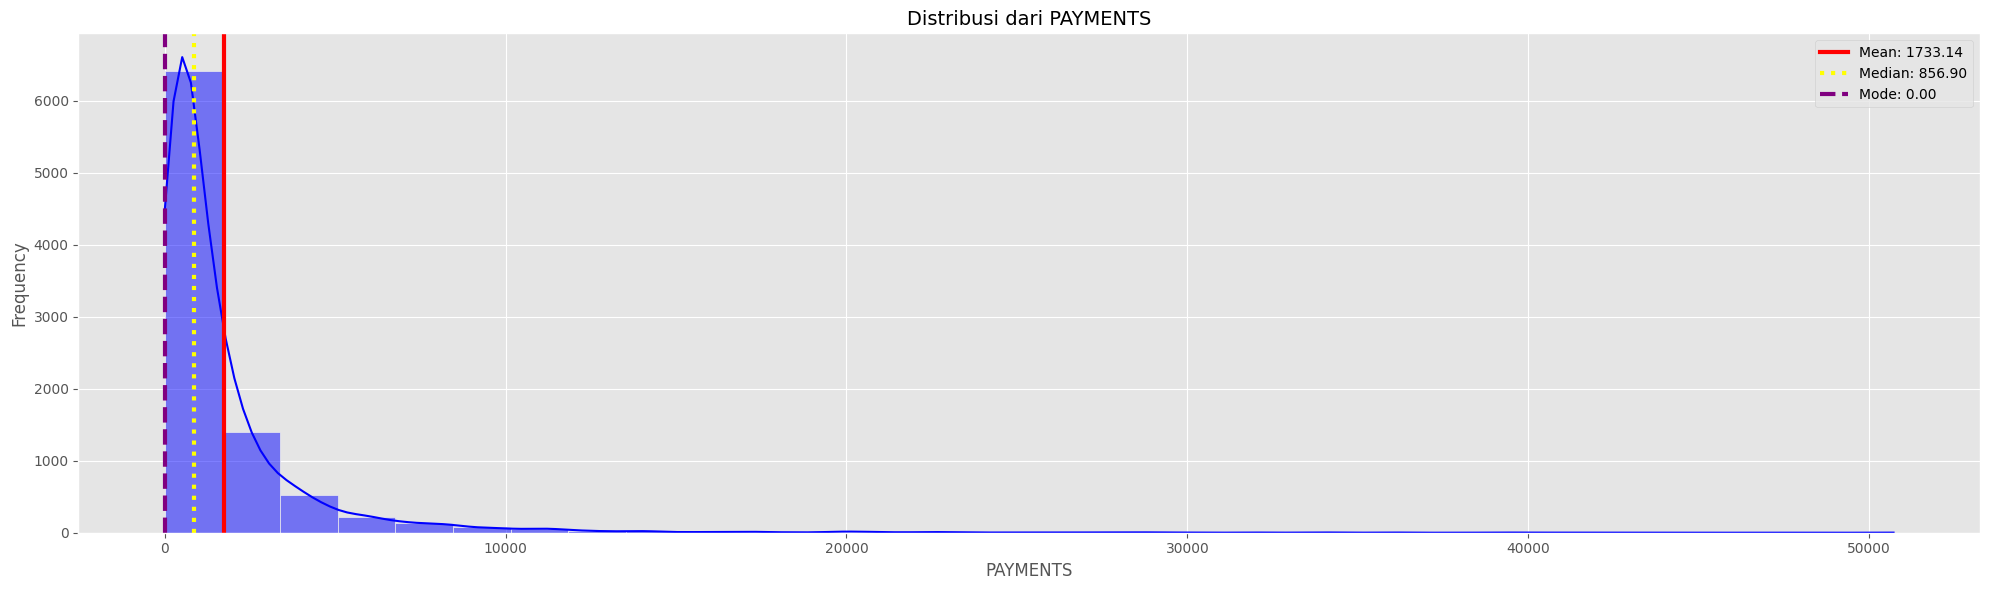

Ringkasan statistik dari PAYMENTS:
Rata-rata: 1733.14
Standar deviasi: 2895.06
Median: 856.90
Mode: 0.00
--------------------------------------------------


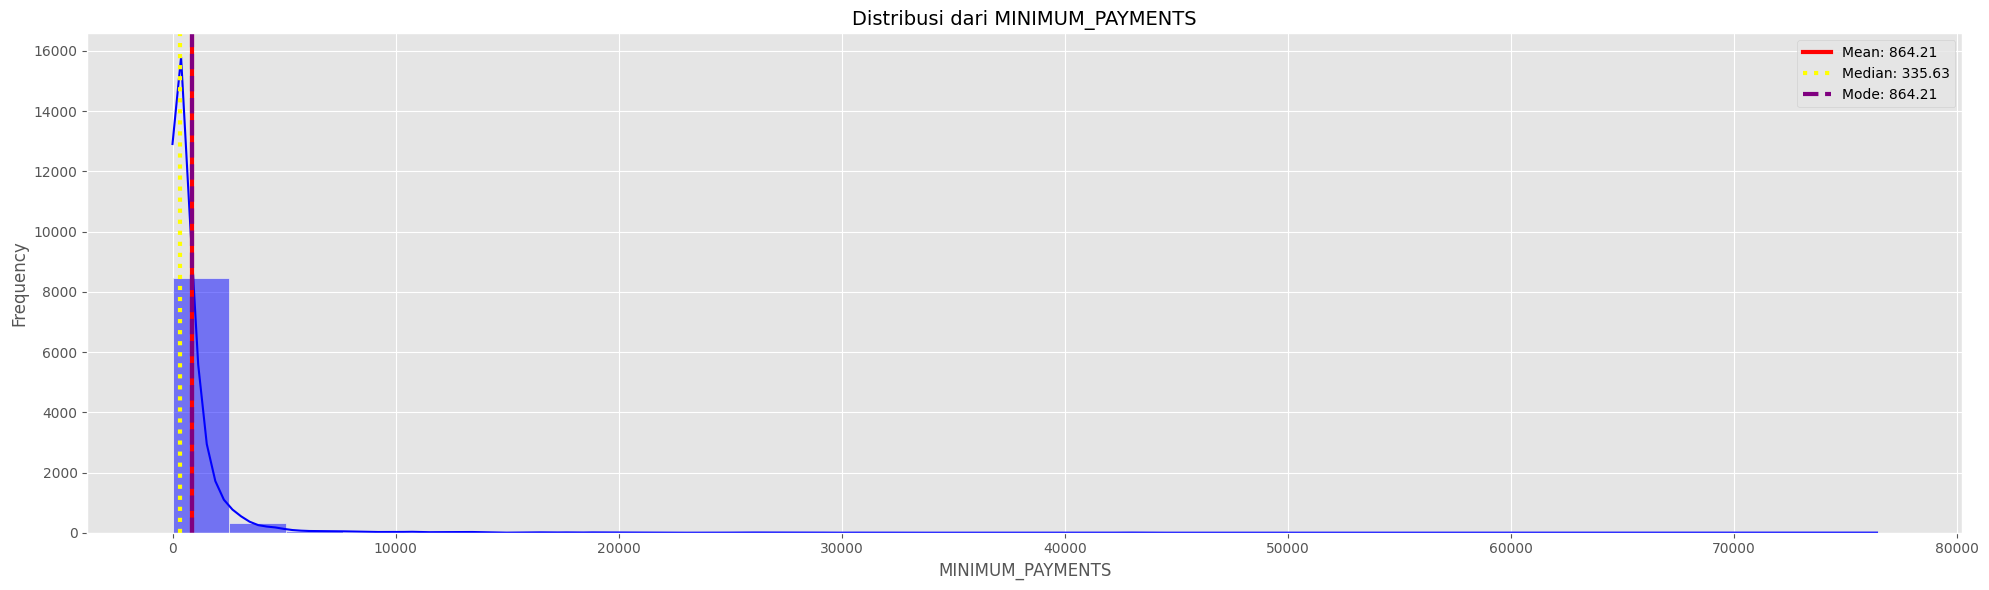

Ringkasan statistik dari MINIMUM_PAYMENTS:
Rata-rata: 864.21
Standar deviasi: 2330.59
Median: 335.63
Mode: 864.21
--------------------------------------------------


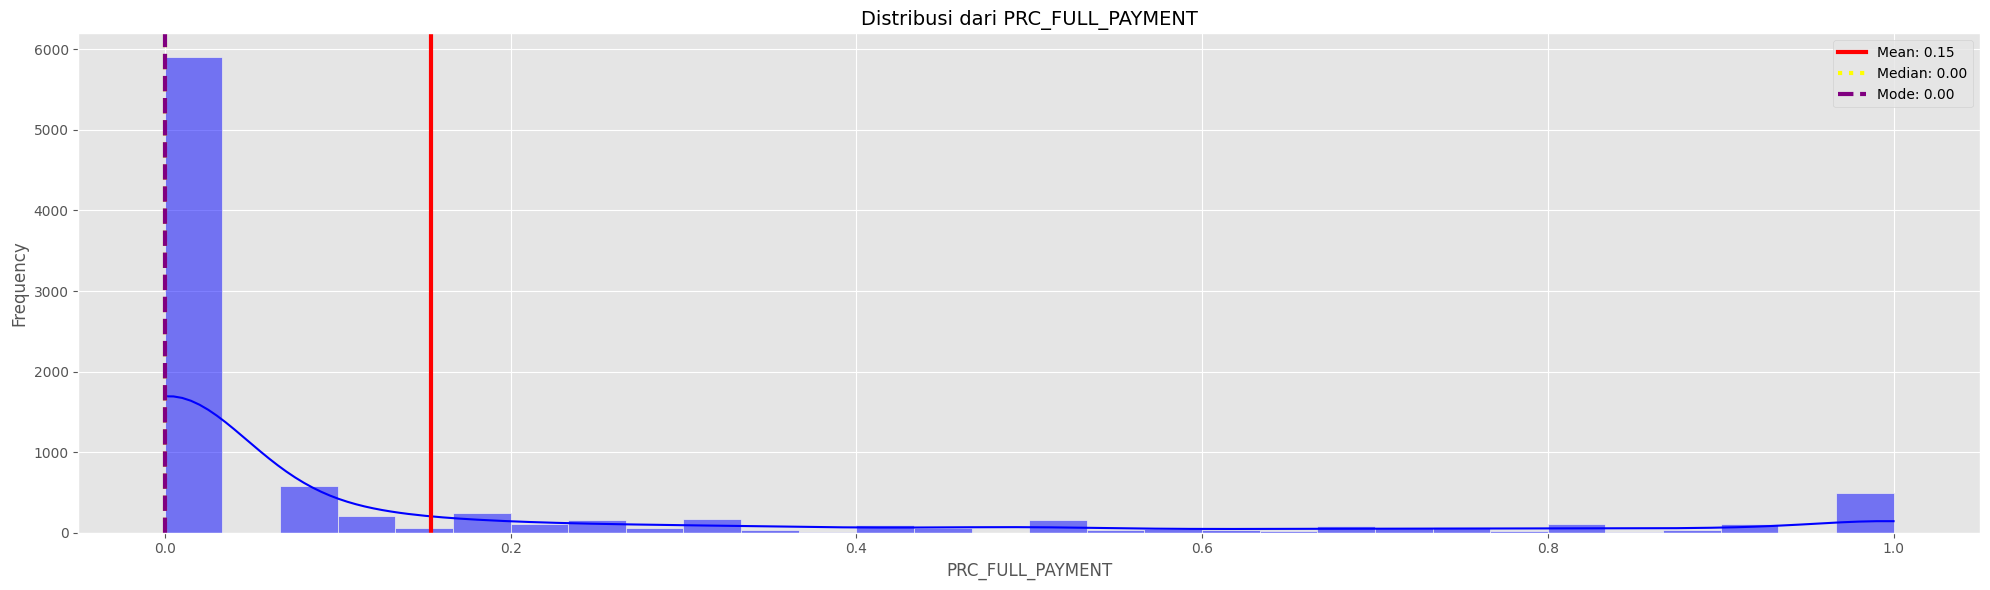

Ringkasan statistik dari PRC_FULL_PAYMENT:
Rata-rata: 0.15
Standar deviasi: 0.29
Median: 0.00
Mode: 0.00
--------------------------------------------------


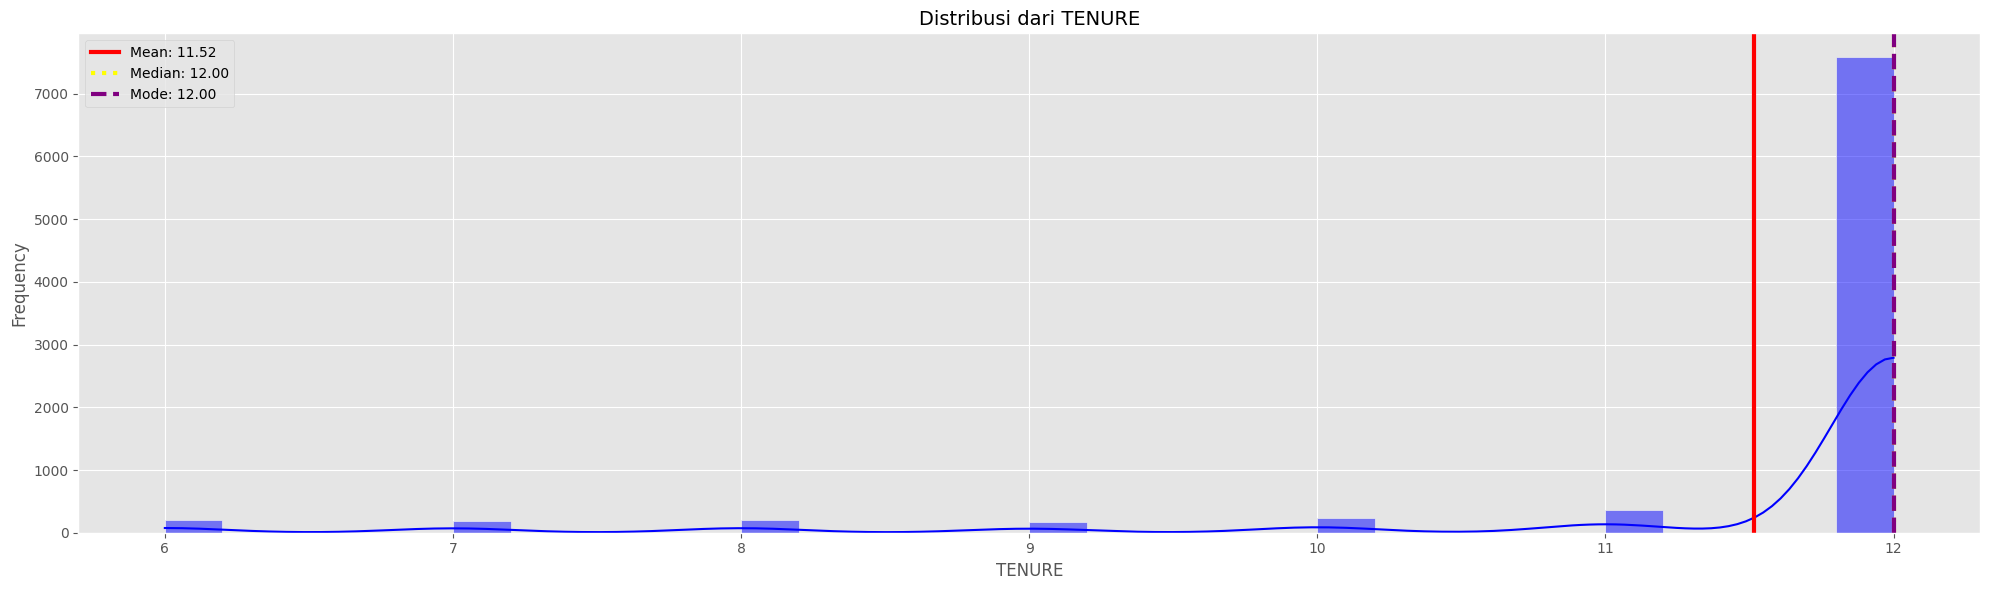

Ringkasan statistik dari TENURE:
Rata-rata: 11.52
Standar deviasi: 1.34
Median: 12.00
Mode: 12.00
--------------------------------------------------


In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pakai style ggplot
plt.style.use('ggplot')

# Looping tiap kolom numerik
for column in df.select_dtypes(exclude='object').columns:
    # Hitung statistik
    average = df[column].mean()
    median = df[column].median()
    mode = df[column].mode().iloc[0]
    std = df[column].std()

    # Buat figure
    plt.figure(figsize=(20, 6))

    # Plot histogram + KDE
    sns.histplot(df[column], kde=True, color='blue', bins=30)
    plt.axvline(average, color='red', linestyle='solid', linewidth=3, label=f'Mean: {average:.2f}')
    plt.axvline(median, color='yellow', linestyle='dotted', linewidth=3, label=f'Median: {median:.2f}')
    plt.axvline(mode, color='purple', linestyle='dashed', linewidth=3, label=f'Mode: {mode:.2f}')

    # Label & title
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Distribusi dari {column}', fontsize=14)
    plt.legend()

    # Layout rapi
    plt.tight_layout()
    plt.show()

    # Print ringkasan statistik
    print(f'Ringkasan statistik dari {column}:')
    print(f'Rata-rata: {average:.2f}')
    print(f'Standar deviasi: {std:.2f}')
    print(f'Median: {median:.2f}')
    print(f'Mode: {mode:.2f}')
    print('-' * 50)

In [238]:
# kita akan membuat correlation heatmap
correlations = df.corr()

<Axes: >

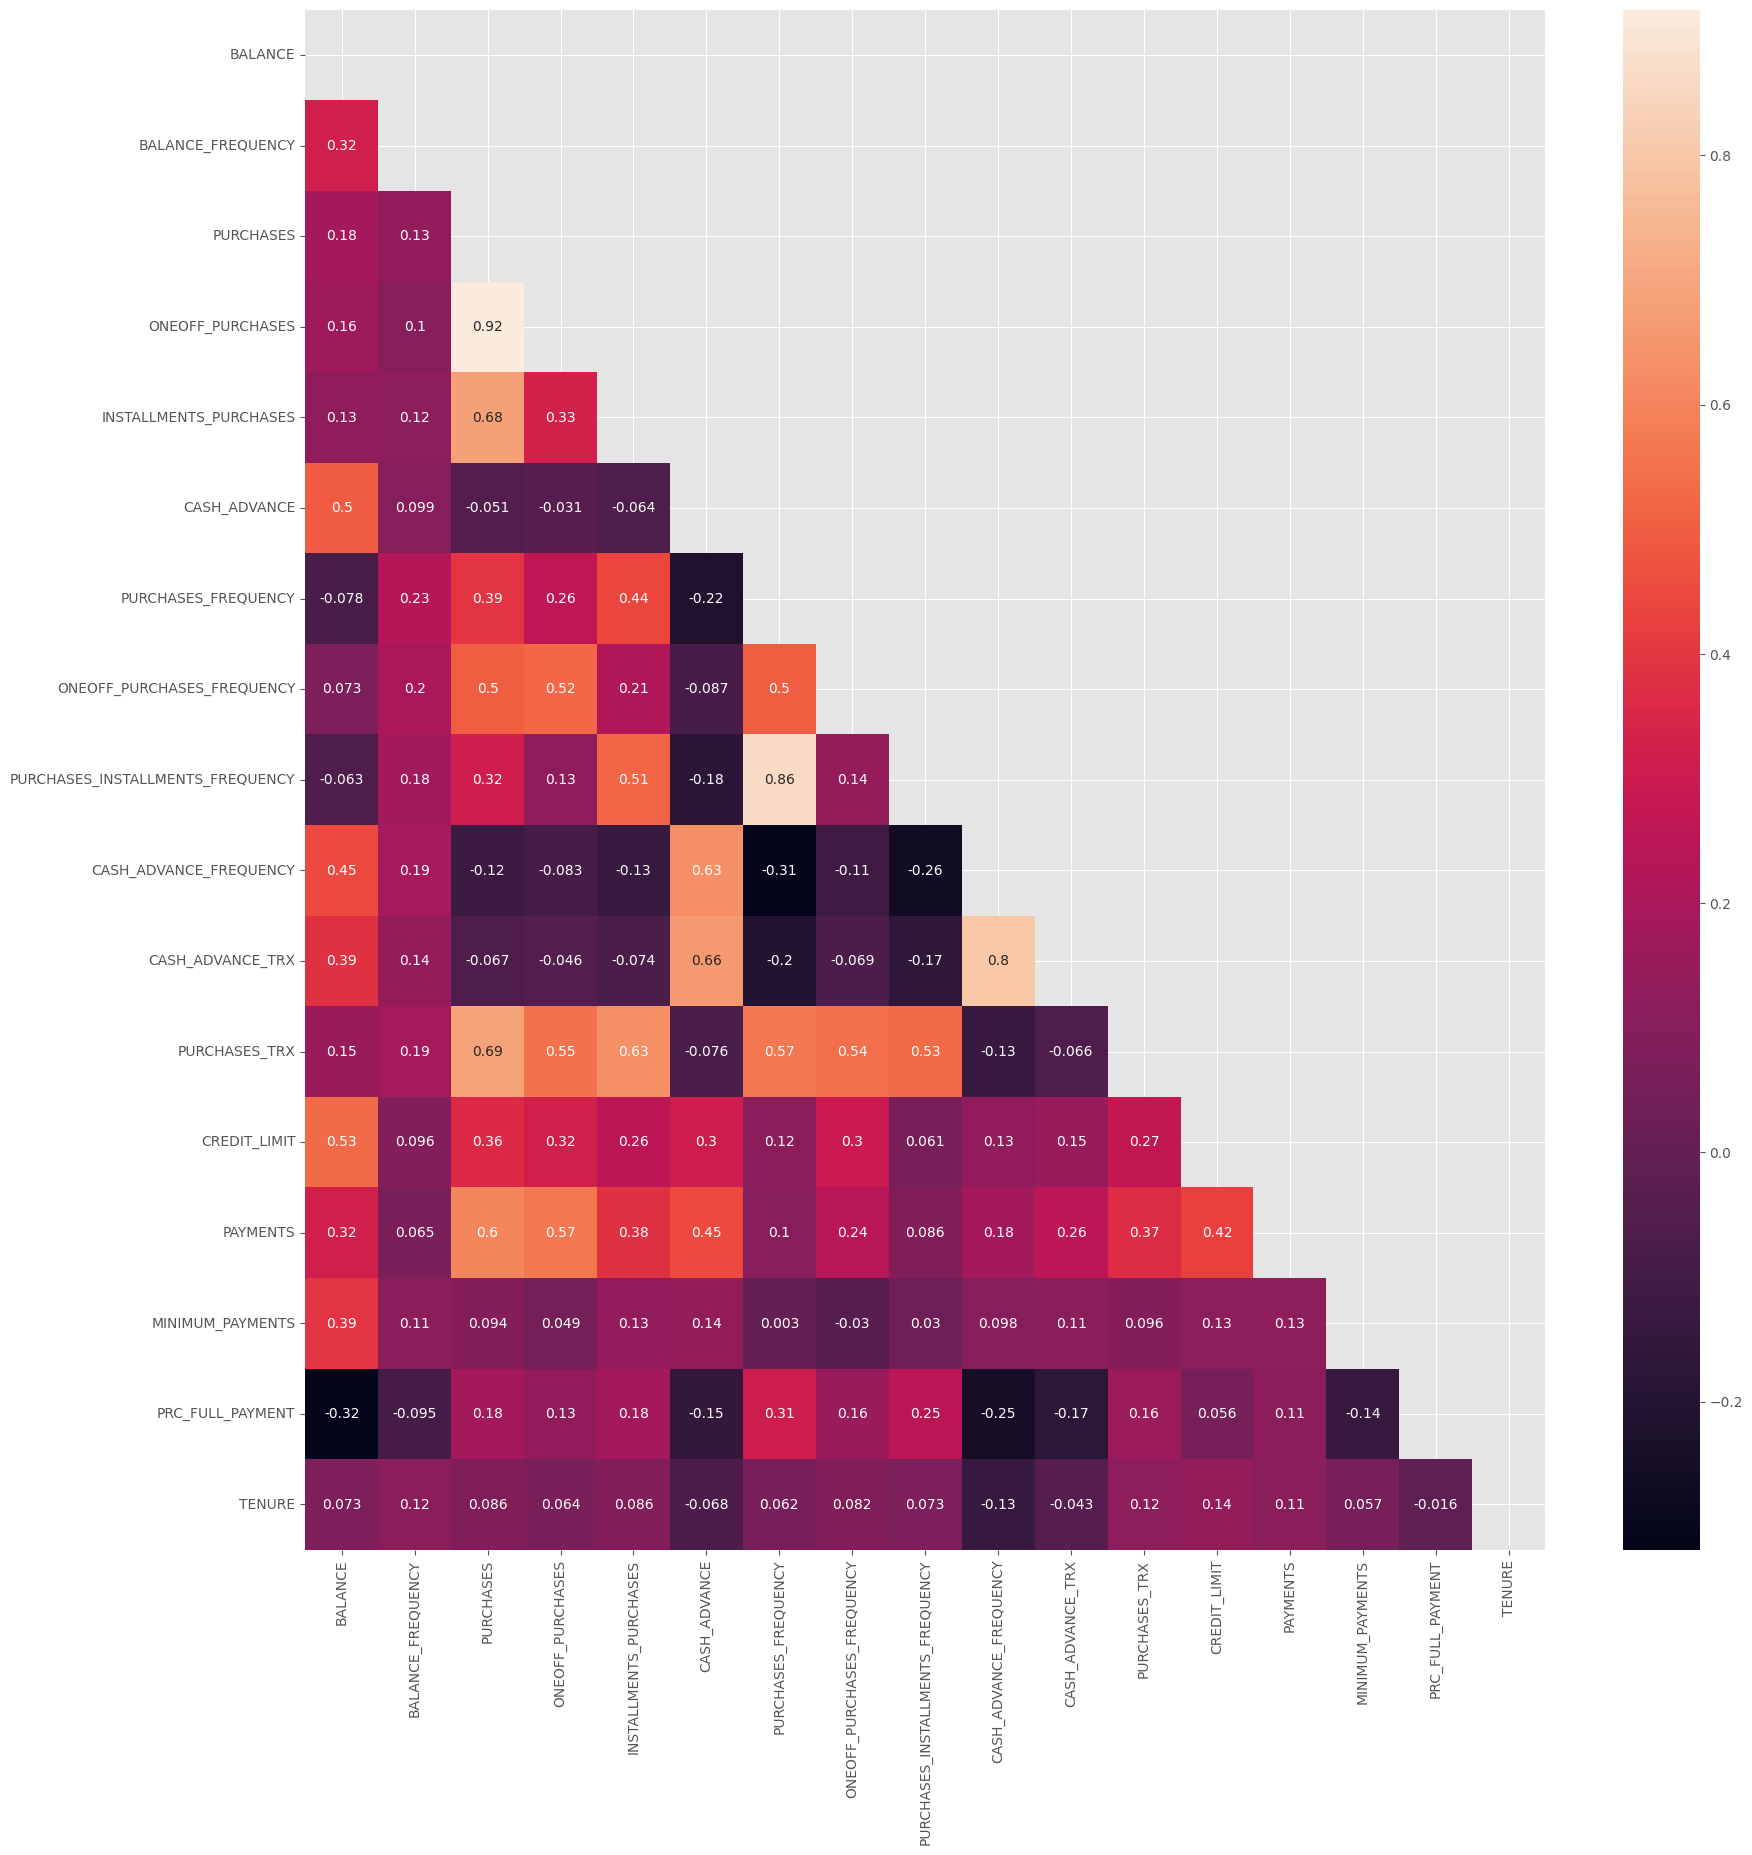

In [239]:
mask = np.triu(np.ones_like(correlations,dtype= bool))
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations,mask = mask , annot = True)

## Find Cluster using Elbow Method

In [240]:
# kita akan lakukan scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [241]:
df_scaled.shape

(8950, 17)

In [242]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

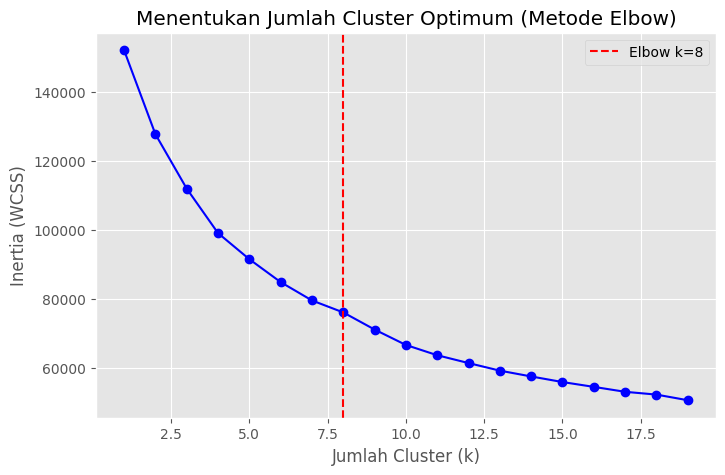

In [243]:
plt.style.use('ggplot')
scores = []
cluster_range = range(1, 20)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    scores.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, scores, 'bo-')
plt.title('Menentukan Jumlah Cluster Optimum (Metode Elbow)')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (WCSS)')

elbow_k = 8
plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Elbow k={elbow_k}')
plt.legend()

plt.show()


Dari sini kita dapat mengamati bahwa cluster ke-4 tampaknya membentuk siku dari kurva.  Namun, nilainya tidak berkurang secara linear hingga cluster ke-8. Mari kita pilih jumlah cluster sebanyak 8.  


## Menerapkan KMeans

In [244]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [245]:
kmeans.cluster_centers_.shape

(8, 17)

In [246]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = df.columns)
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2.058233,0.380125,-0.008668,-0.018266,0.012715,3.443464,-0.166359,0.000556,-0.114164,2.464589,3.214804,0.038914,1.388970,2.012618,0.571945,-0.287571,0.036356
1,-0.697312,-2.143216,-0.315217,-0.234345,-0.314691,-0.311810,-0.559017,-0.424876,-0.459982,-0.483072,-0.366196,-0.425994,-0.210357,-0.226025,-0.255247,0.264202,-0.176963
2,-0.423285,0.306369,-0.059228,-0.245620,0.311194,-0.377428,1.006329,-0.378927,1.188022,-0.481567,-0.370117,0.137881,-0.332000,-0.254585,-0.127285,0.402403,-0.042480
3,0.930844,0.337142,-0.339787,-0.243746,-0.355650,0.950975,-0.732450,-0.361609,-0.635260,1.445542,0.994548,-0.430999,0.394792,0.086235,0.159508,-0.431688,-0.283473
4,1.374491,0.412070,7.177493,6.384202,5.239545,0.016050,1.082454,1.917512,1.031769,-0.290144,-0.107898,4.786628,2.181050,4.962364,0.709040,0.864673,0.332658
5,0.164517,0.429473,0.940910,0.887776,0.593733,-0.297602,1.099708,1.847568,0.564352,-0.393199,-0.307858,1.198653,0.719818,0.392337,-0.040770,0.432402,0.276054
6,1.210379,0.466916,0.002326,-0.286478,0.530986,-0.040978,0.064311,-0.558459,0.305943,-0.260594,-0.091820,0.196738,-0.058635,-0.083957,10.408907,-0.525551,0.294258
7,-0.136799,0.373512,-0.320844,-0.201091,-0.389067,-0.233015,-0.739663,-0.281685,-0.722615,-0.134223,-0.197983,-0.443459,-0.397414,-0.294149,-0.092992,-0.445219,0.100819


In [247]:
# Untuk memahami arti dari angka-angka ini, kita lakukan inverse transformasi
# agar nilai cluster centers kembali ke skala aslinya
cluster_centers = scaler.inverse_transform(cluster_centers)

# Konversi hasil cluster centers ke dalam DataFrame dengan kolom sesuai dataset asli
cluster_centers = pd.DataFrame(data=cluster_centers, columns=df.columns)

# Tampilkan cluster centers
cluster_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5848.513259,0.967319,984.685104,562.119201,422.565903,8199.976109,0.423583,0.202623,0.319066,0.628334,25.187500,15.677083,9548.090278,7559.476647,2197.100405,6.960499e-02,11.565972
1,113.079432,0.369563,329.738267,203.472183,126.496698,324.991337,0.265990,0.075709,0.181629,0.038477,0.749806,4.121212,3729.086165,1078.824664,269.364053,2.309892e-01,11.280497
2,683.443581,0.949847,876.663311,184.758400,692.476679,187.386829,0.894239,0.089416,0.836588,0.038778,0.723047,18.137039,3286.497461,996.144363,567.574172,2.714105e-01,11.460470
3,3501.948033,0.957137,277.244641,187.868206,89.457512,2973.109920,0.196383,0.094583,0.111969,0.424412,10.035885,3.996810,5930.864869,1982.786503,1235.932054,2.745343e-02,11.137959
4,4425.362379,0.974886,16338.028250,11188.905375,5149.122875,1012.529590,0.924792,0.774489,0.774489,0.077083,2.512500,133.687500,12430.000000,16098.700812,2516.595215,4.066166e-01,11.962500
5,1906.902342,0.979009,3013.474153,2065.963667,947.972735,354.785761,0.931716,0.753623,0.588725,0.056461,1.147920,44.503852,7113.441658,2868.920117,769.194924,2.801849e-01,11.886749
6,4083.777061,0.987879,1008.174444,116.942444,891.232000,892.937661,0.516162,0.035859,0.486027,0.082997,2.622222,19.600000,4281.111111,1490.095282,25121.724754,-8.326673e-17,11.911111
7,1279.738367,0.965752,317.717399,258.668039,59.238897,490.228592,0.193488,0.118426,0.077252,0.108285,1.897740,3.687093,3048.493553,881.610354,647.493591,2.349562e-02,11.652241


In [248]:
labels.shape

(8950,)

In [249]:
labels.max()

np.int32(7)

In [250]:
labels.min()

np.int32(0)

In [251]:
y_kmeans = kmeans.predict(df_scaled)
y_kmeans

array([7, 3, 5, ..., 2, 7, 1], dtype=int32)

In [252]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis=1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


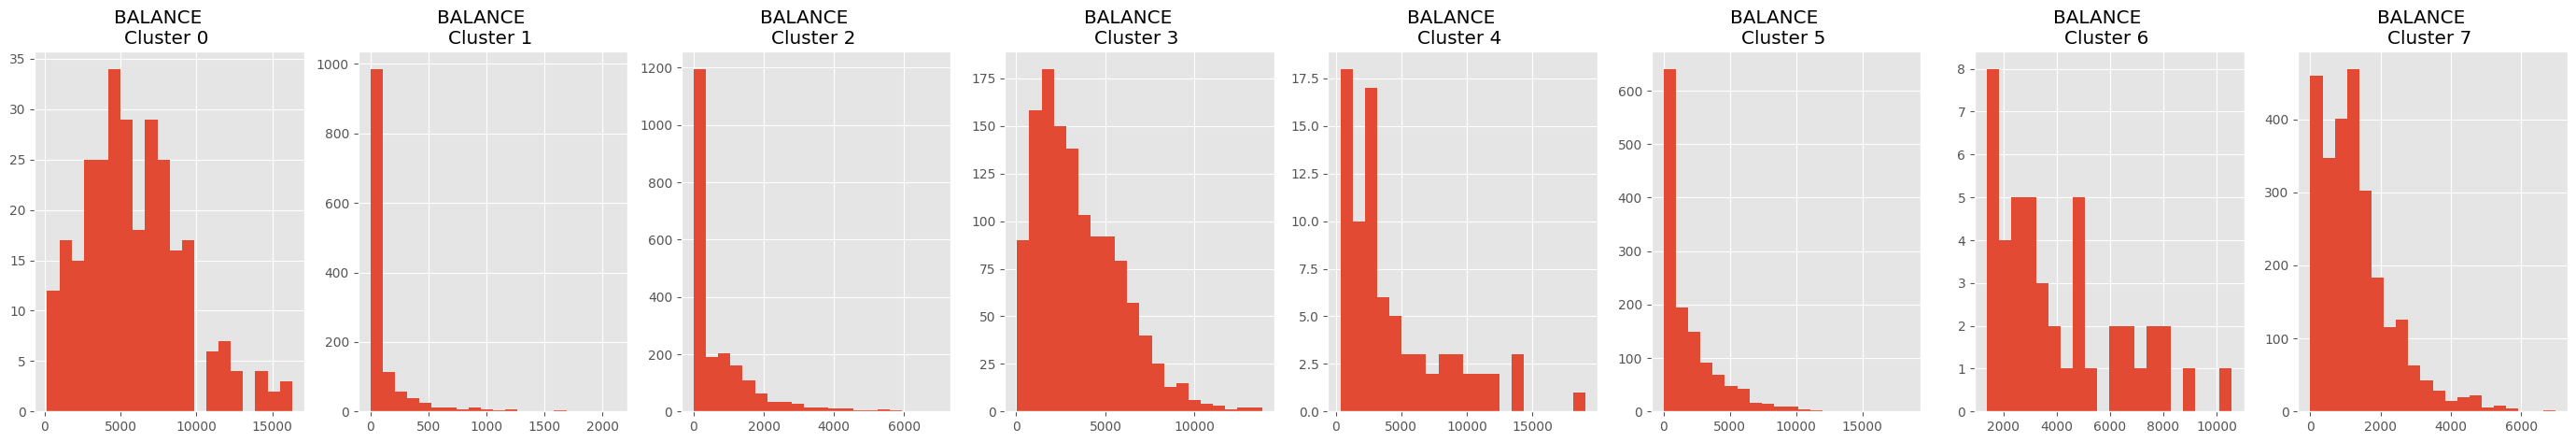

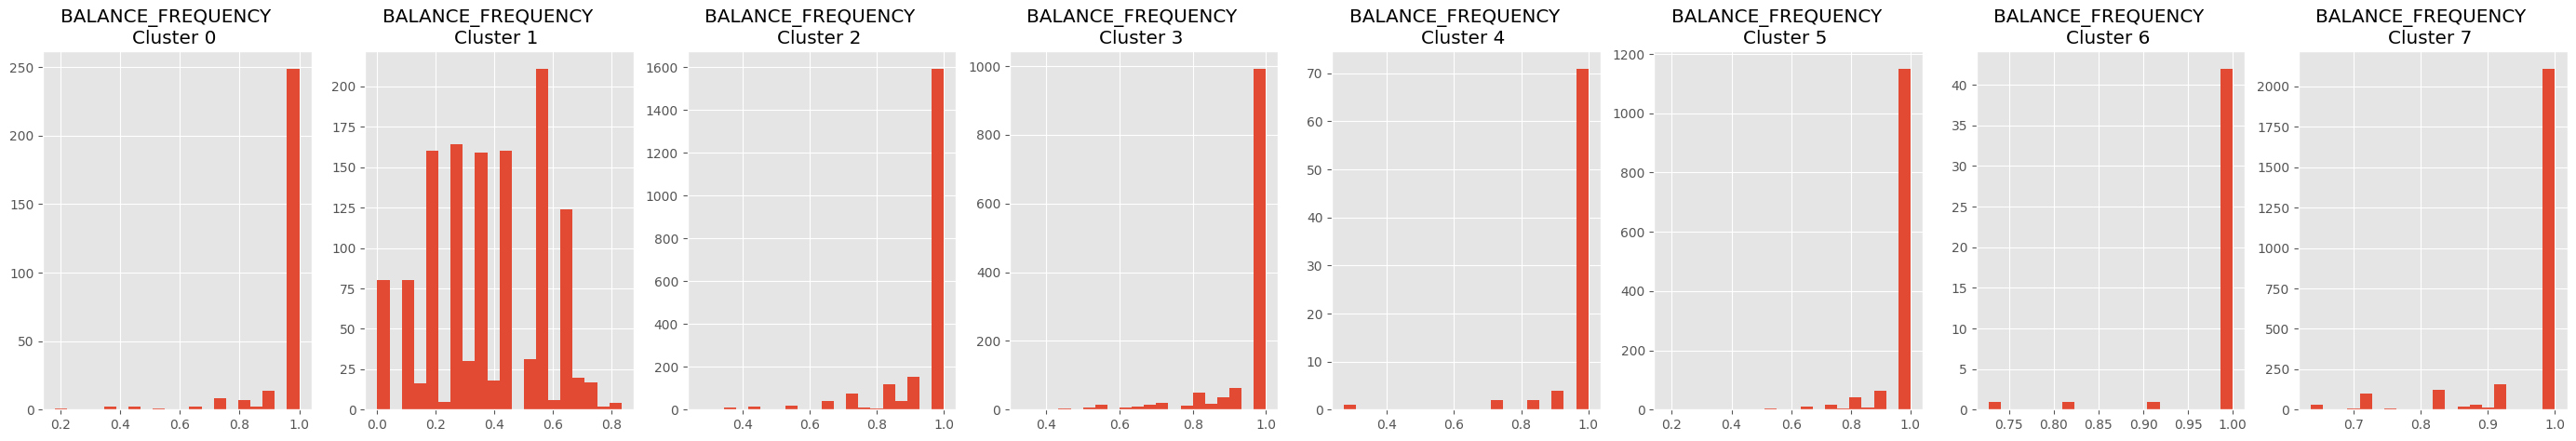

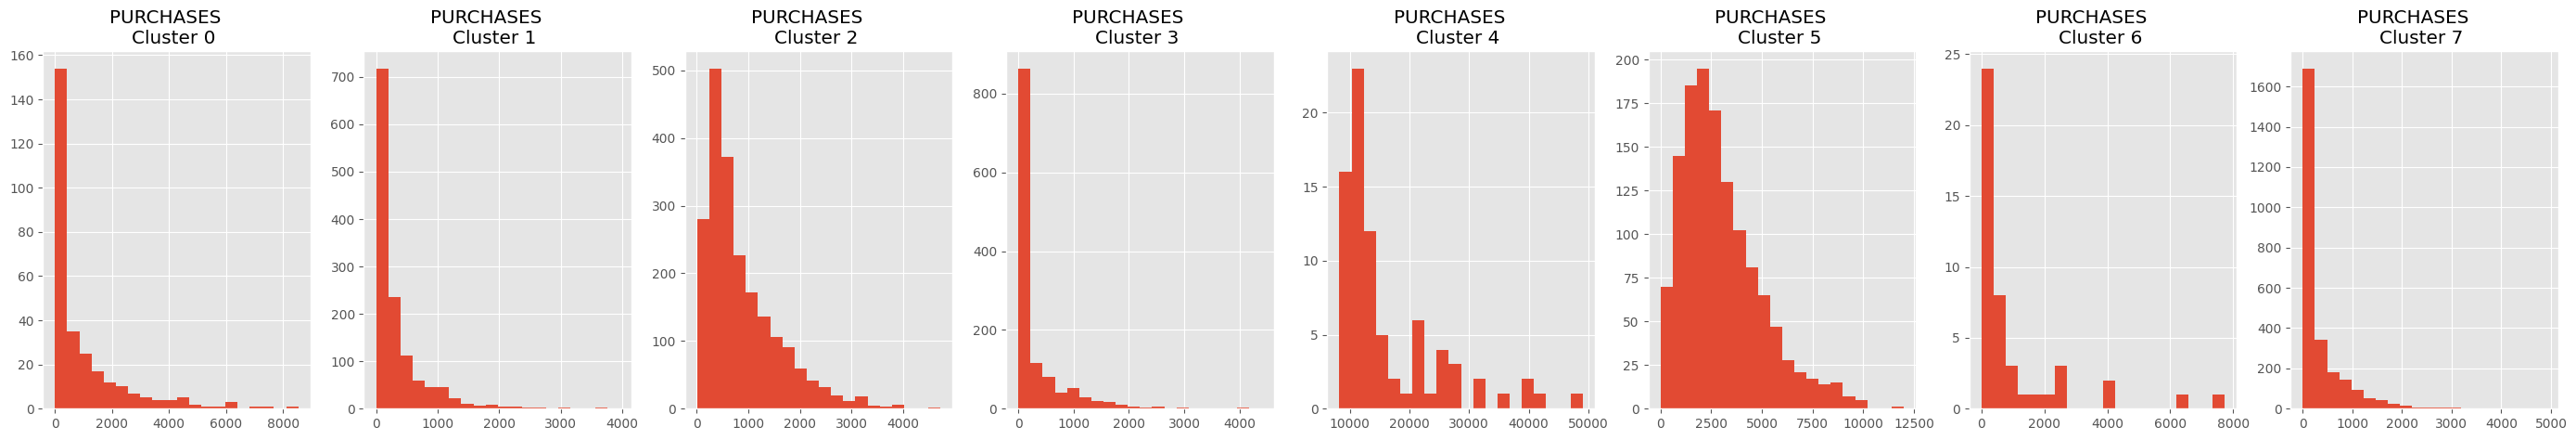

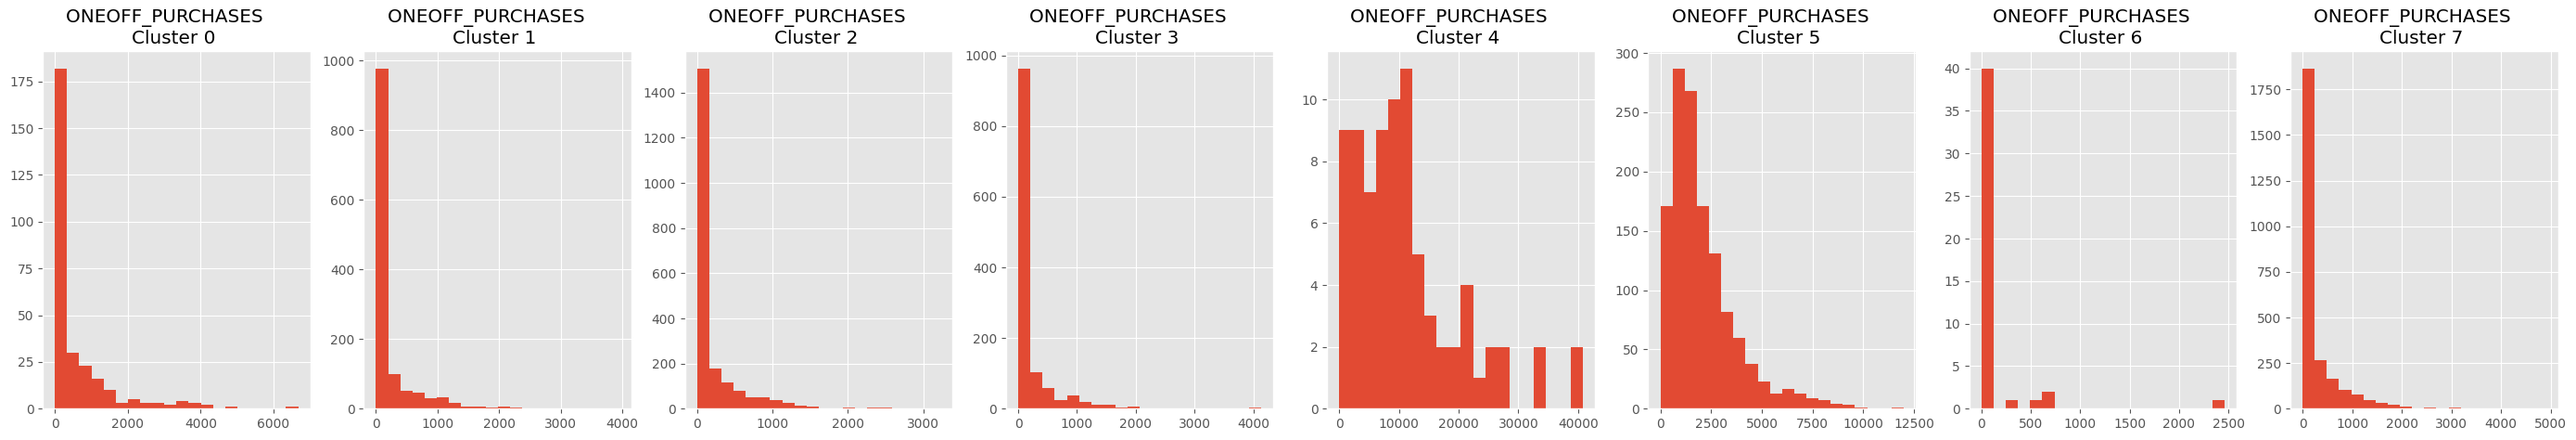

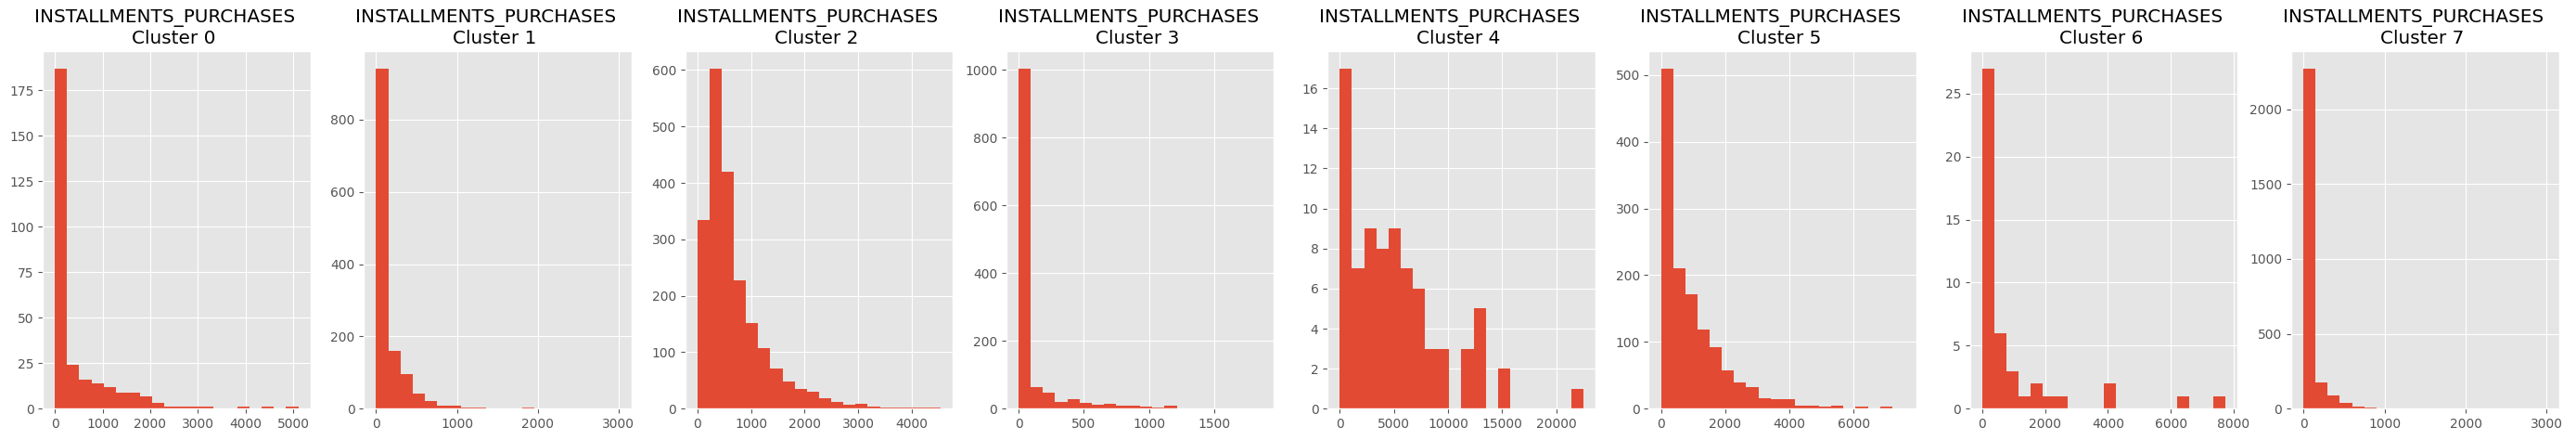

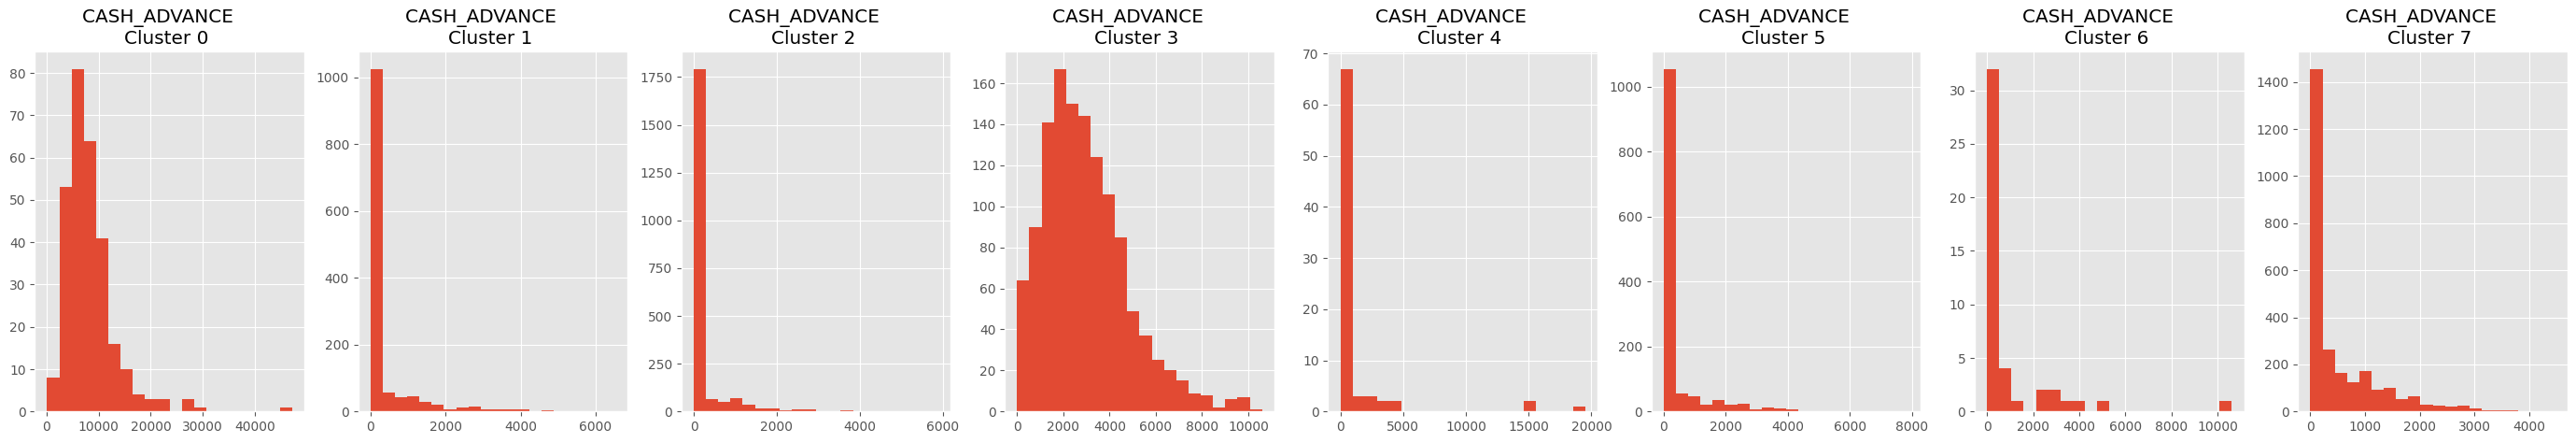

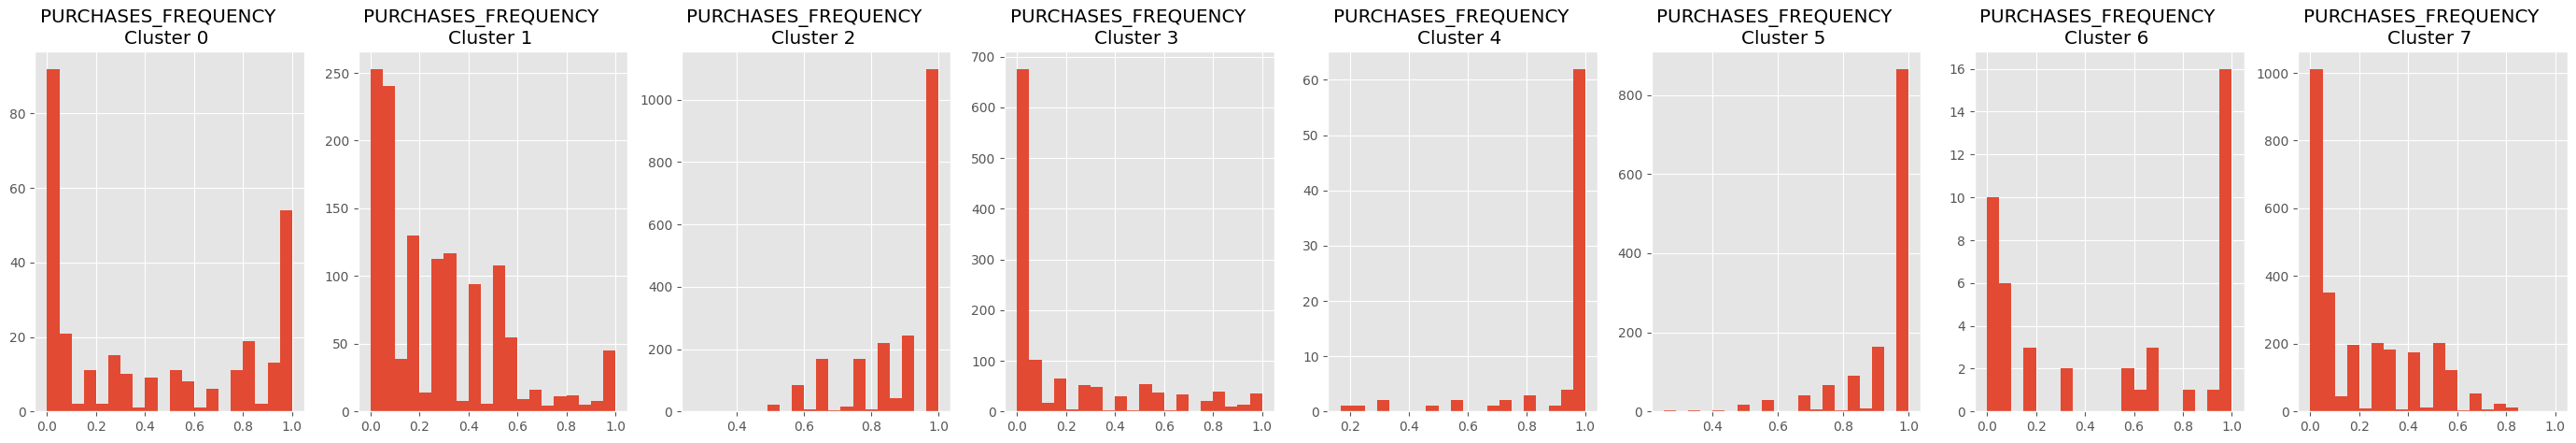

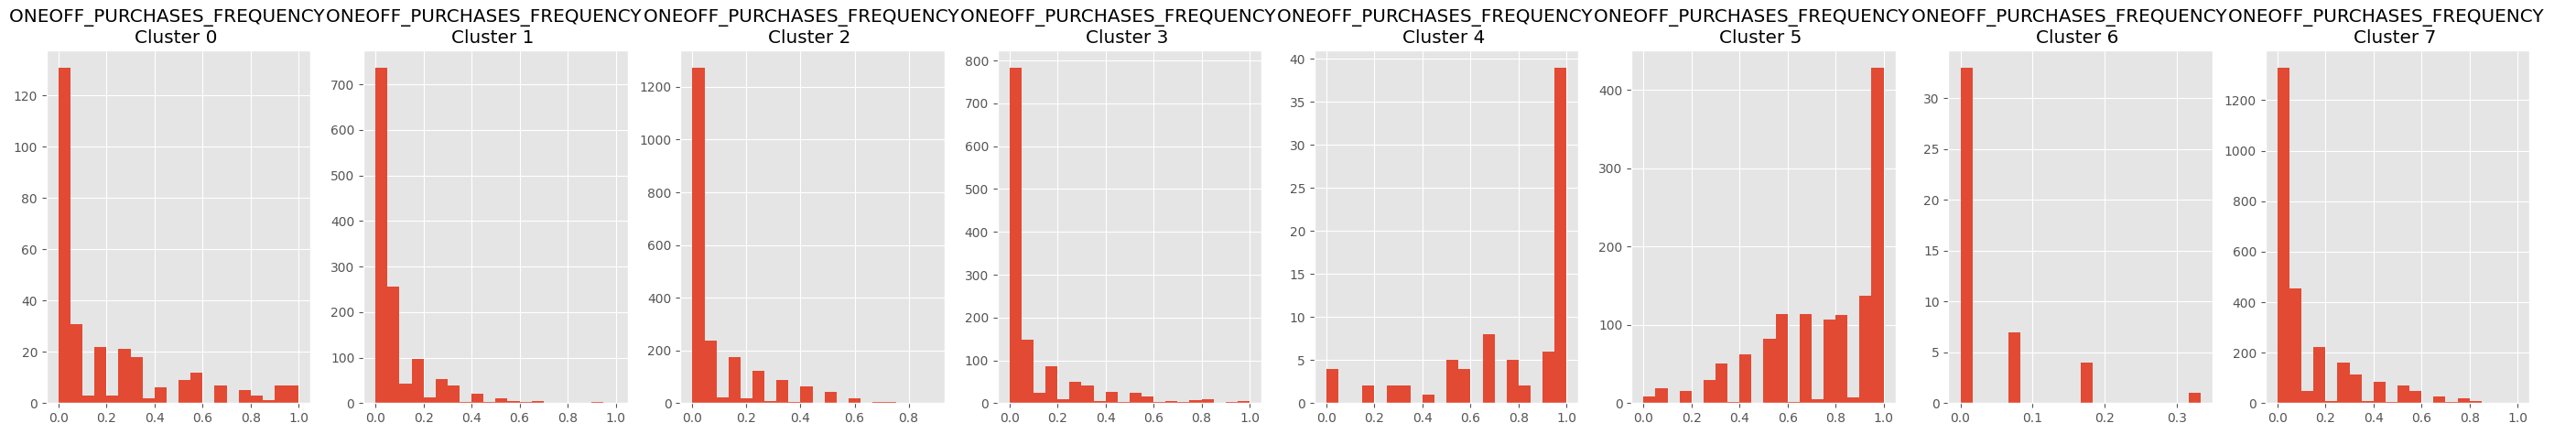

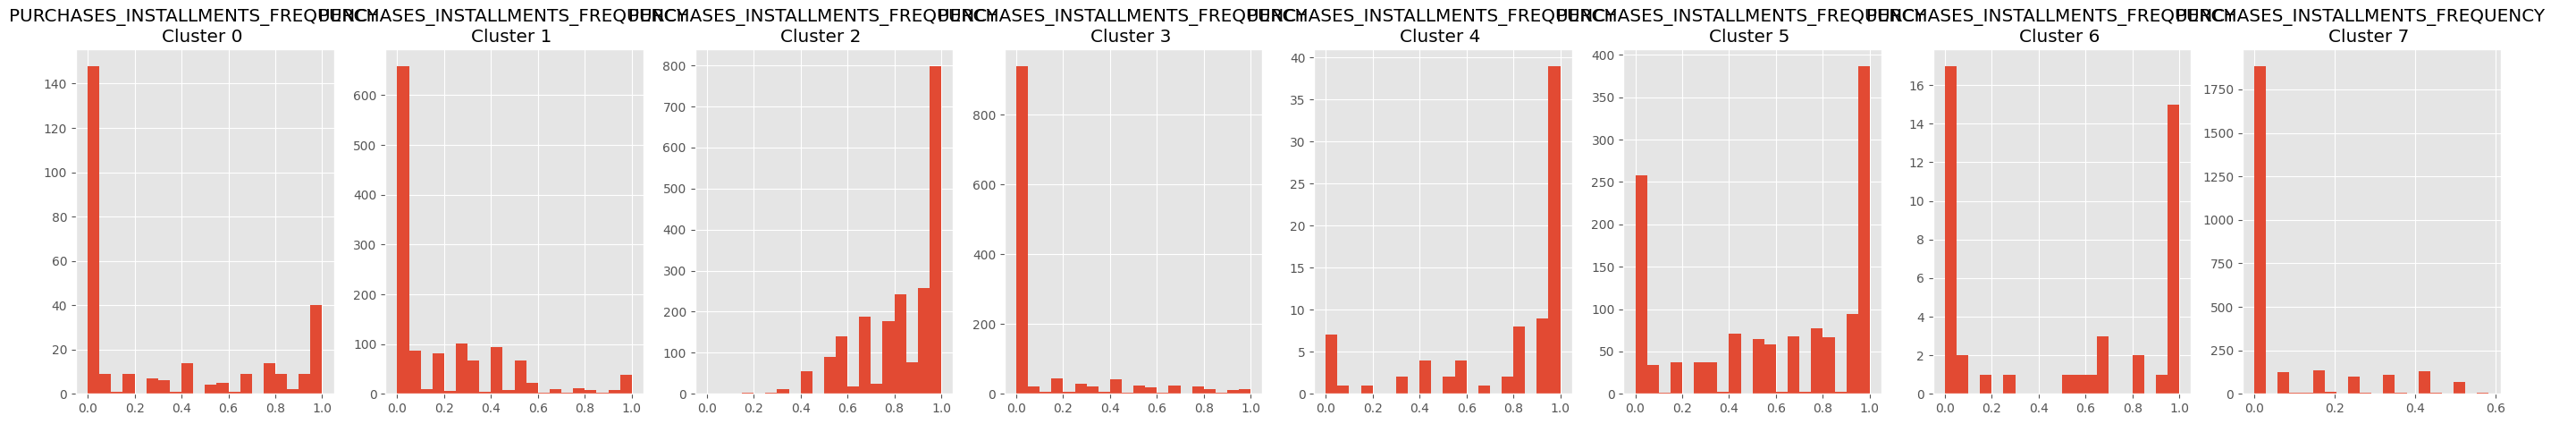

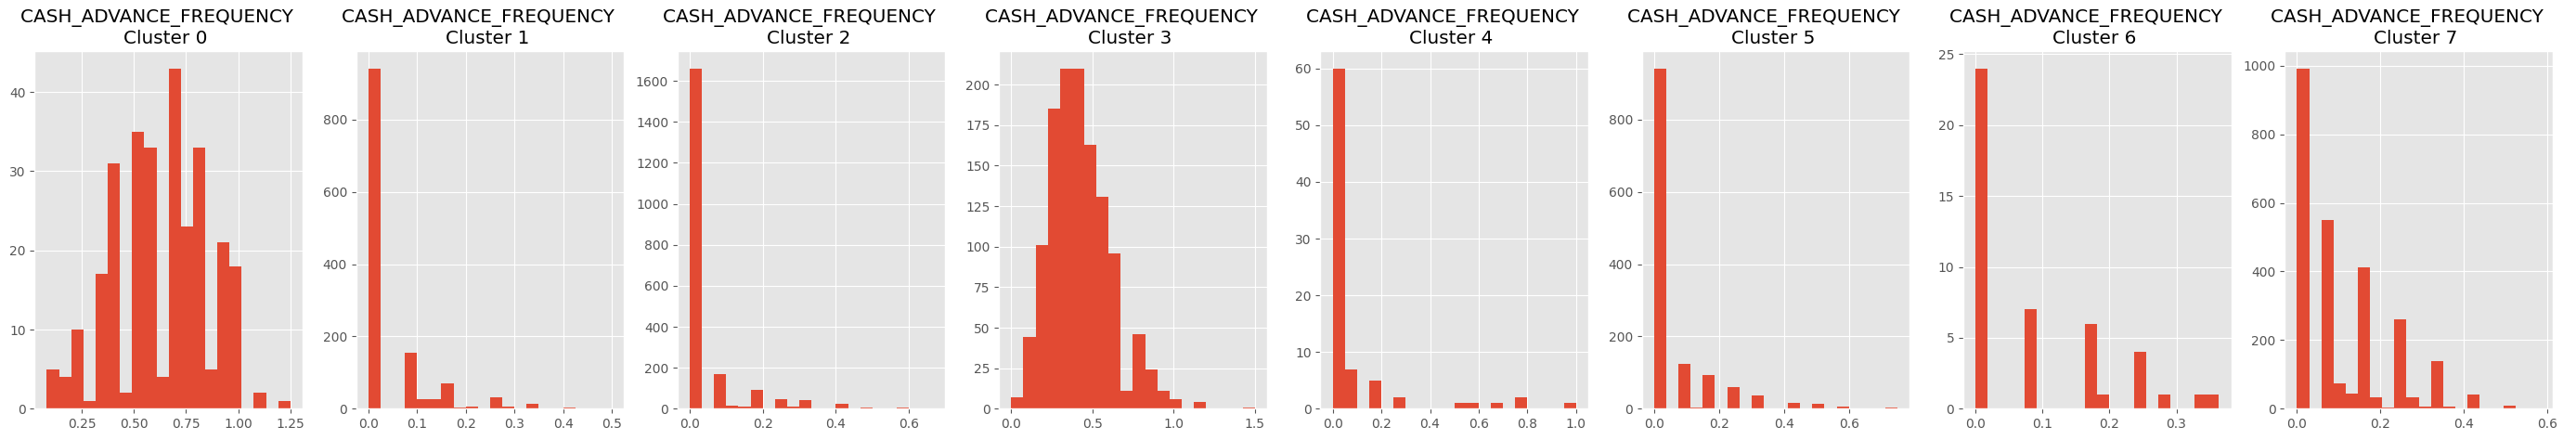

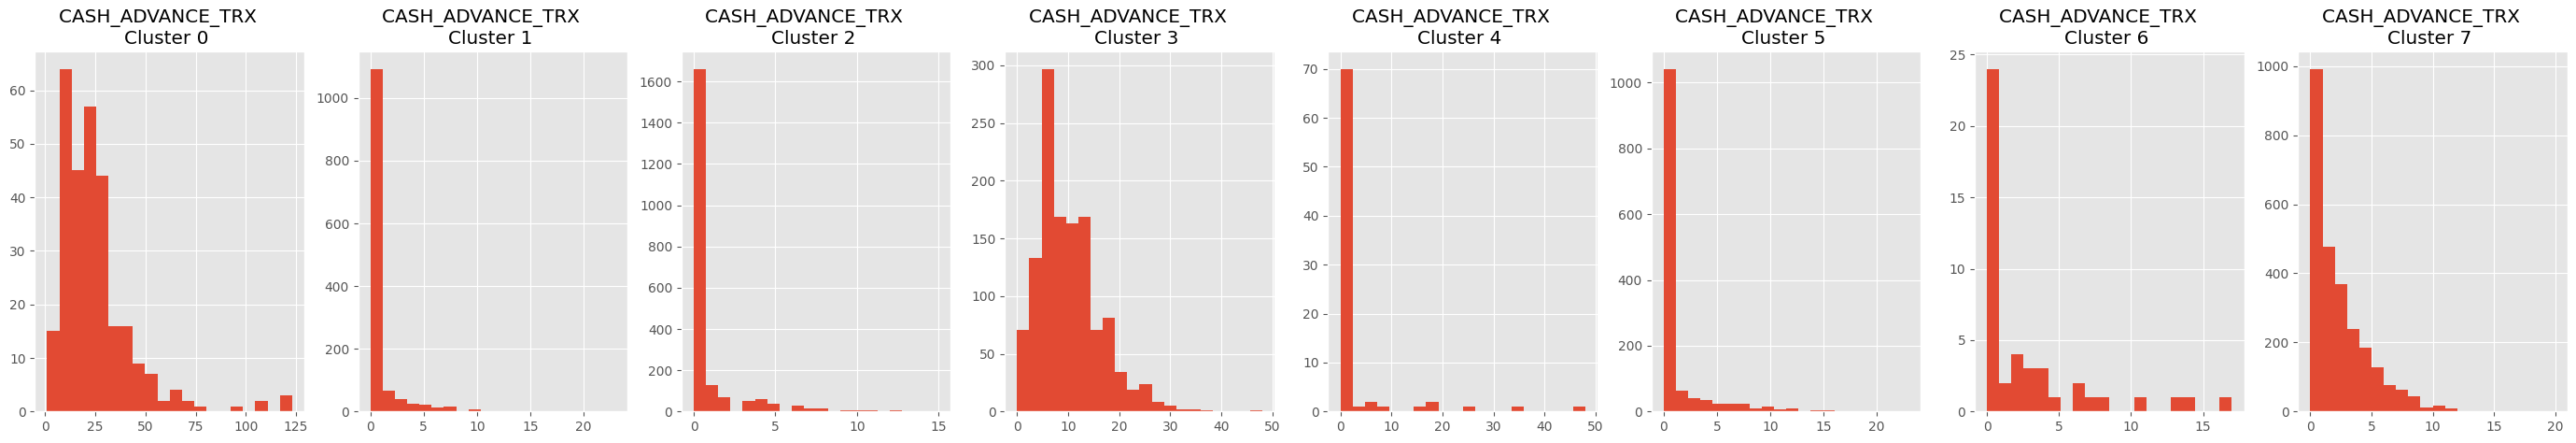

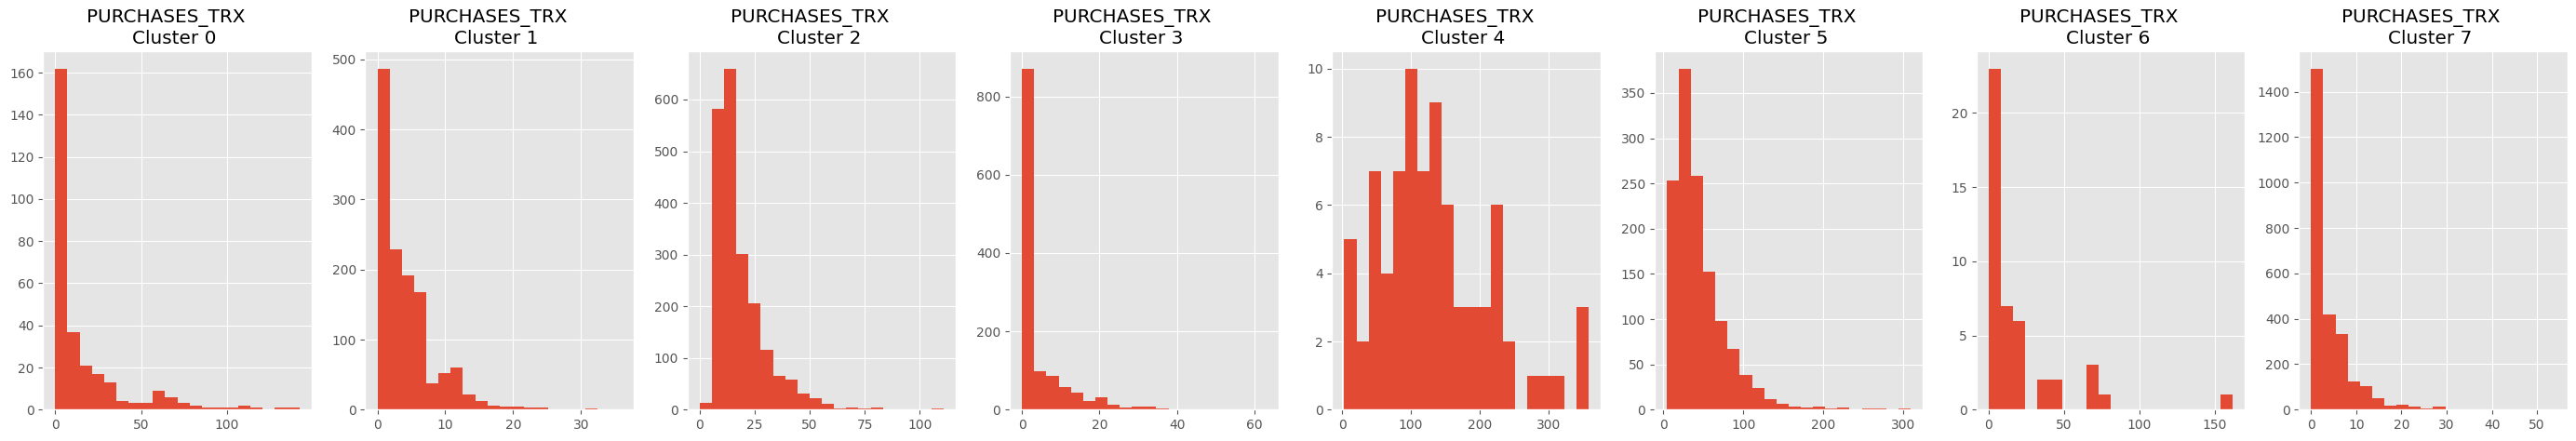

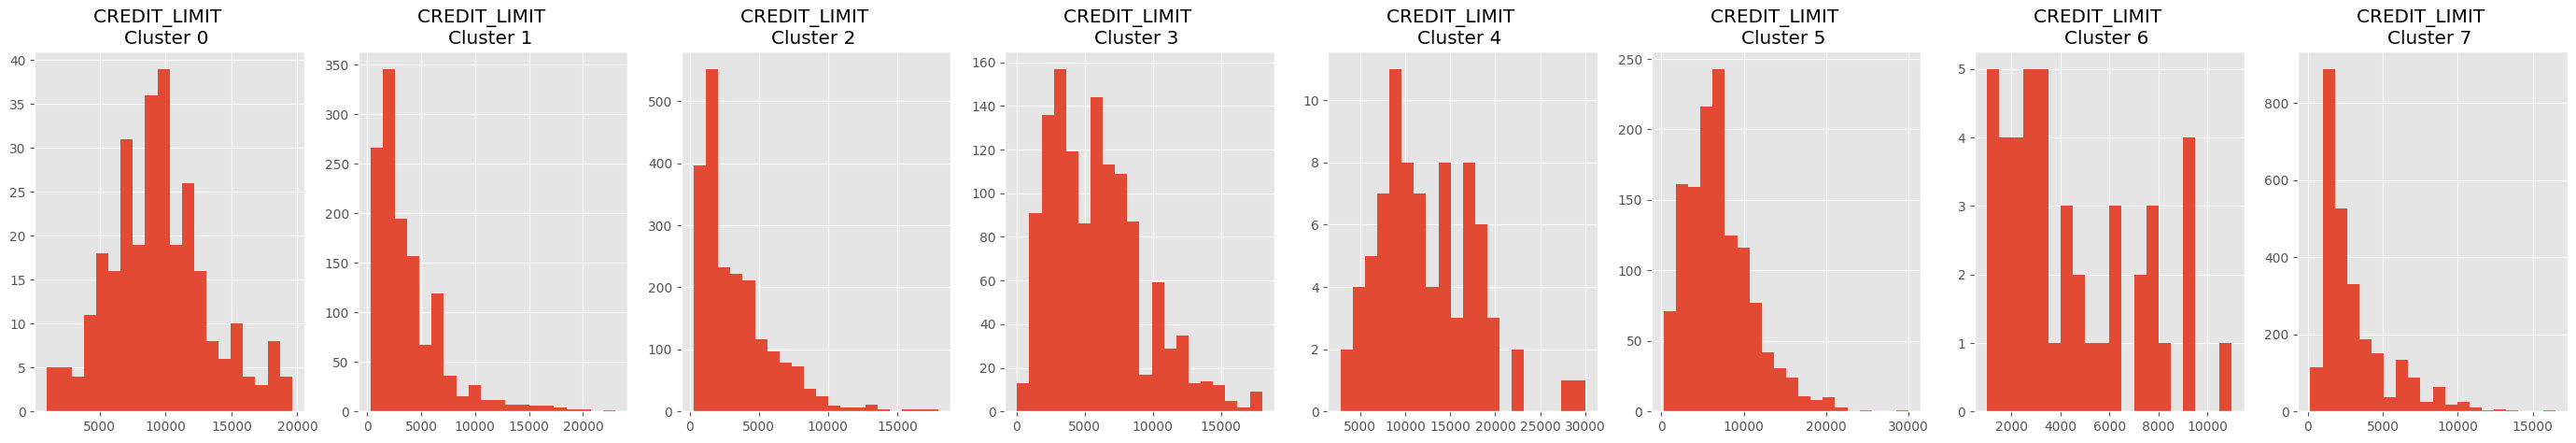

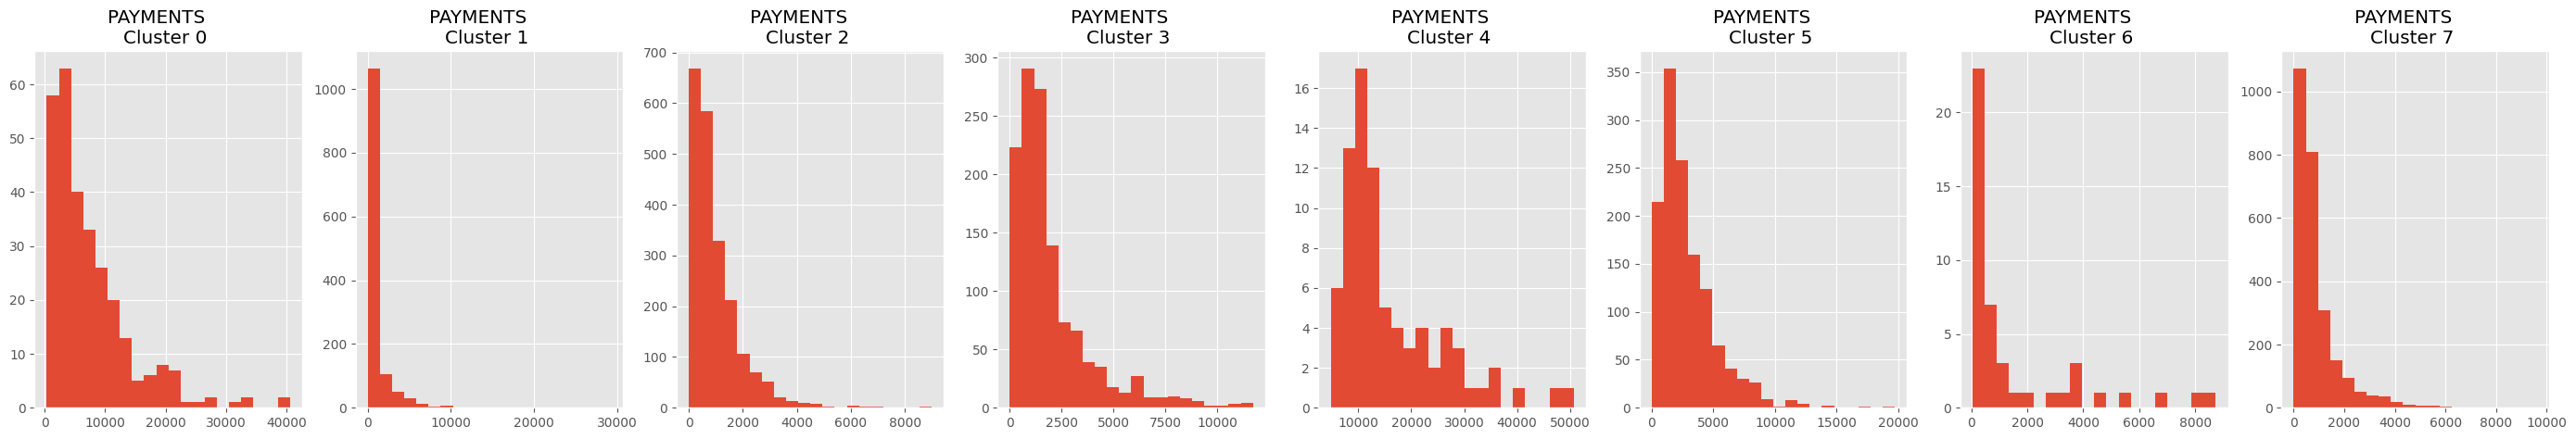

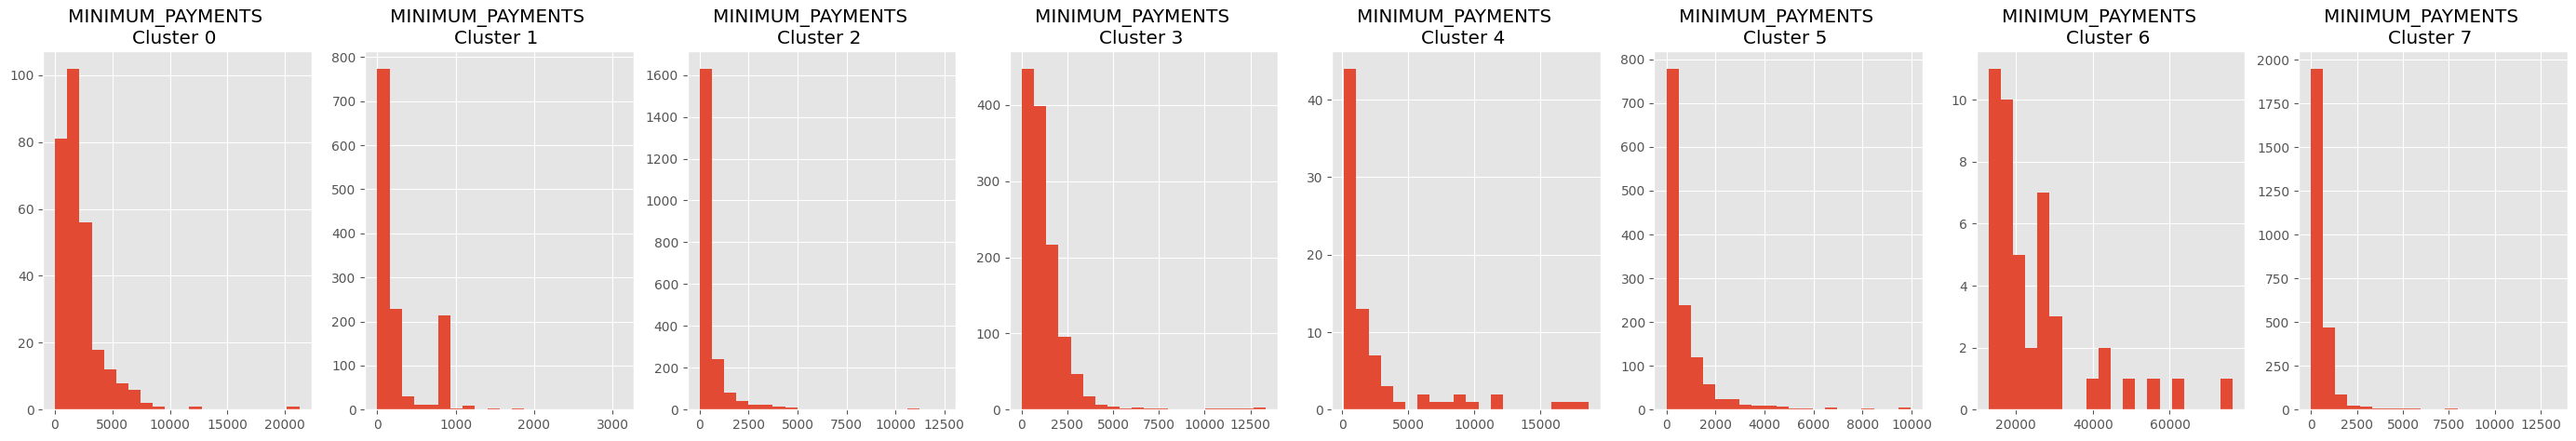

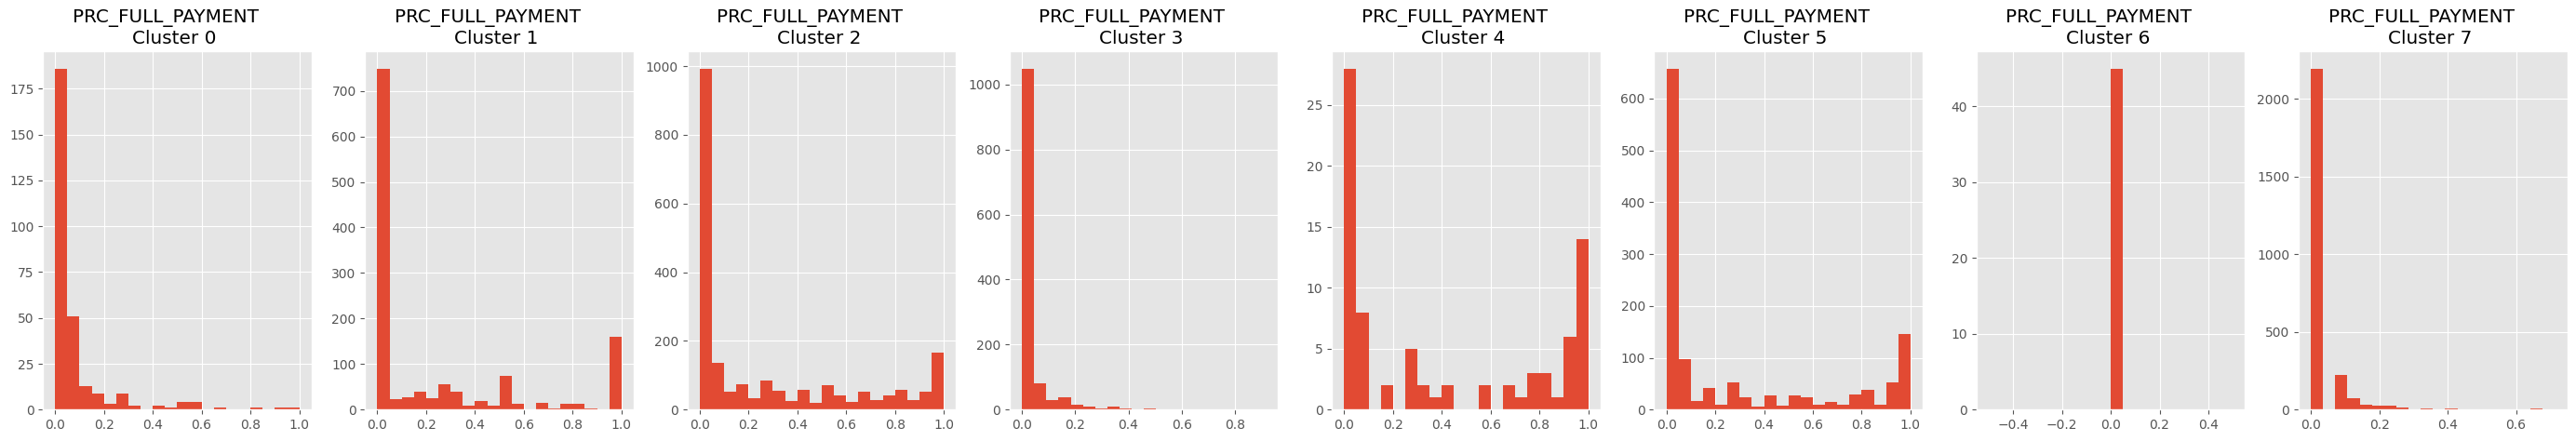

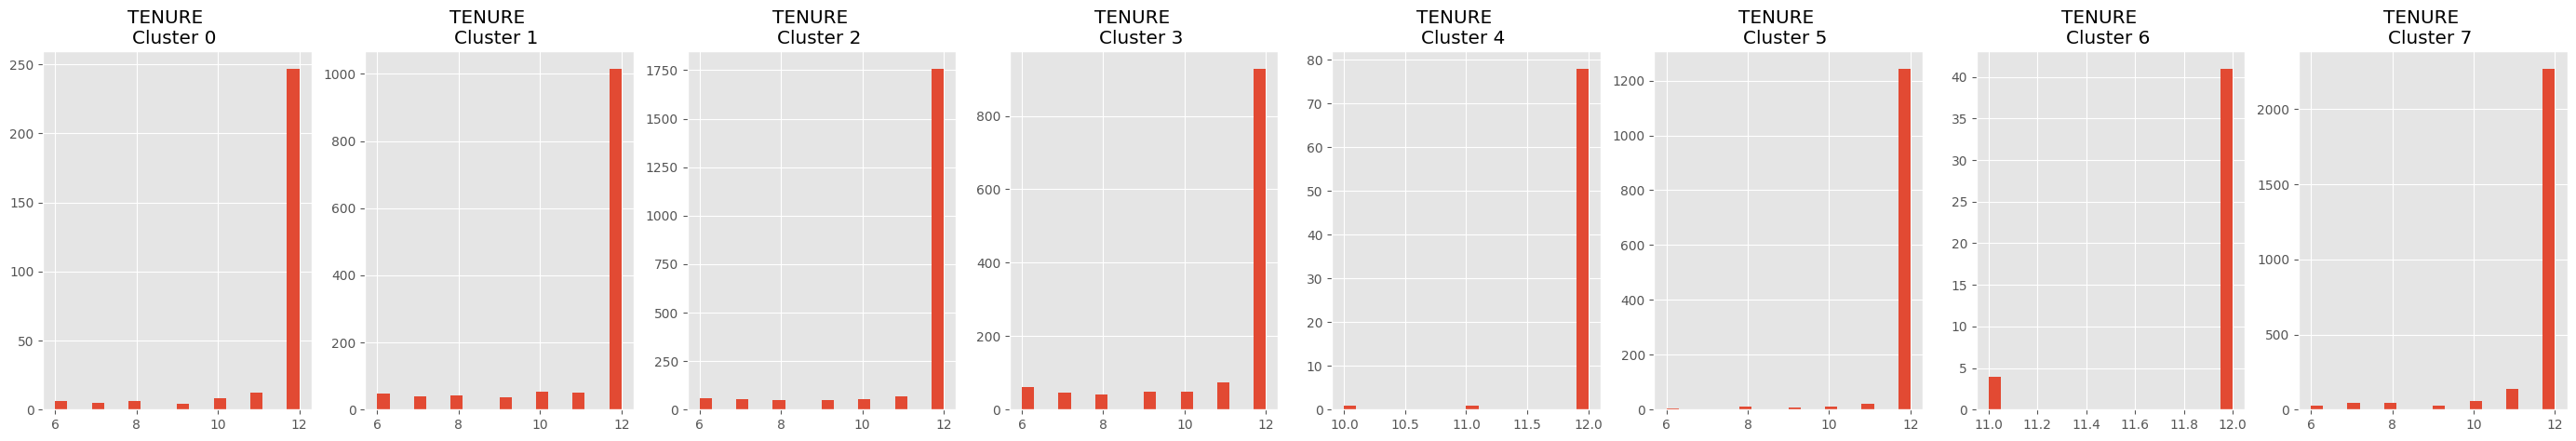

In [253]:
# kita akan mengamati karakteristik tiap klaster
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()

## Mengaplikasikan PCA dan Visualisasi Hasil

In [254]:
# disini kita akan menggunakan n_components = 2
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222026, -1.07645061],
       [-1.1382949 ,  2.50647666],
       [ 0.96968401, -0.3835203 ],
       ...,
       [-0.92620364, -1.8107856 ],
       [-2.33655167, -0.65796601],
       [-0.55642216, -0.40046712]])

In [255]:
# buat dataframe dengan dua komponen
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383520
3,-0.873628,0.043166
4,-1.599434,-0.688581


In [256]:
# concatenate klasternya
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster': labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,7
1,-1.138295,2.506477,3
2,0.969684,-0.383520,5
3,-0.873628,0.043166,7
4,-1.599434,-0.688581,7


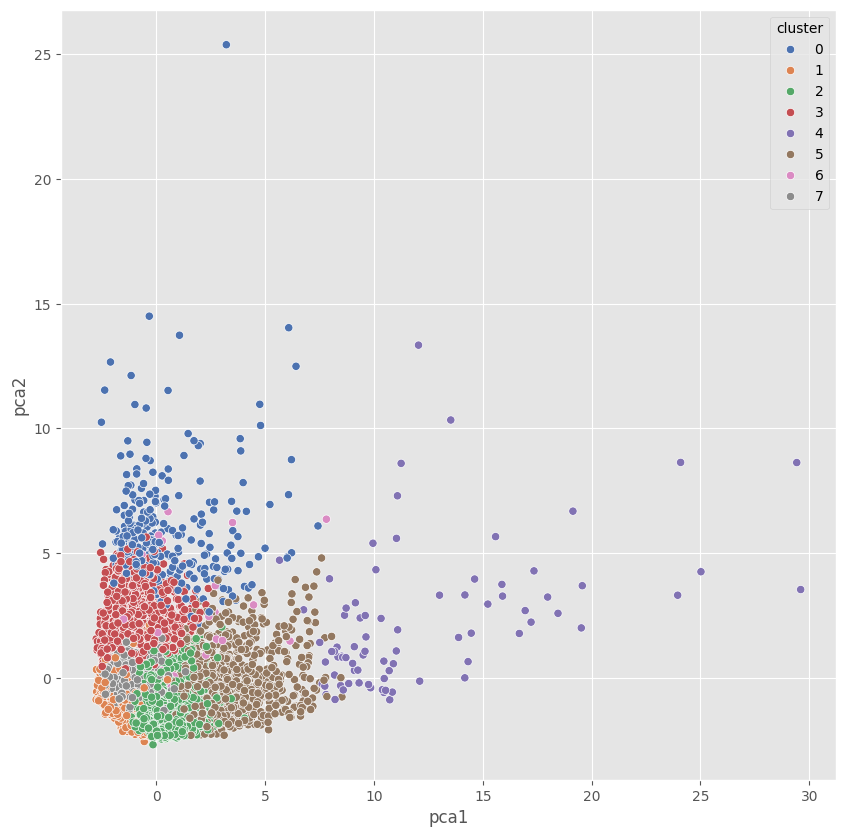

In [257]:
# visualisasi
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette='deep')
plt.show()

## Autoencoders

In [258]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - digunakan untuk dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [259]:
df_scaled.shape

(8950, 17)

In [260]:
# fit autoencodernya
autoencoder.fit(df_scaled, df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.6936
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.2971
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.2376
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.2004
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.1728
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.1717
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.1479
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.1269
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.1241
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.1176
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.1116
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0999
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0976
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0922
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0900
Epoc

In [261]:
autoencoder.save_weights('autoencoder.weights.h5')

In [262]:
pred = encoder.predict(df_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [263]:
pred.shape

(8950, 10)

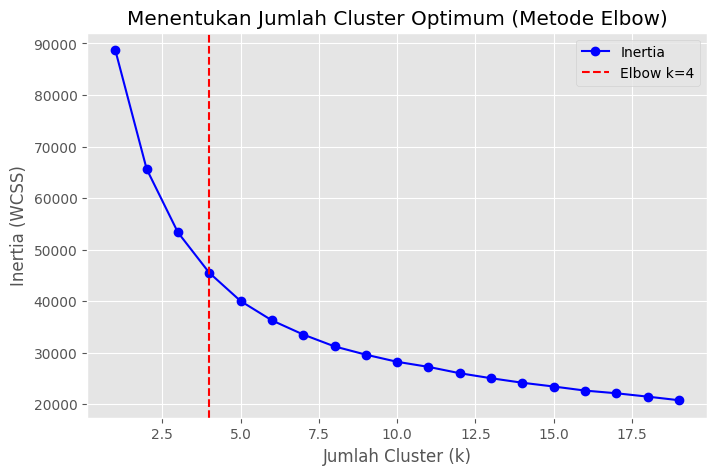

In [264]:
plt.style.use('ggplot')

scores_2 = []
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_values, scores_2, 'bo-', label='Inertia')

plt.title('Menentukan Jumlah Cluster Optimum (Metode Elbow)')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (WCSS)')

elbow_k = 4
plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Elbow k={elbow_k}')

plt.legend()
plt.show()


/tmp/ipython-input-1172336751.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores, 'bx-', color = 'r')
/tmp/ipython-input-1172336751.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


Text(0, 0.5, 'inertia')

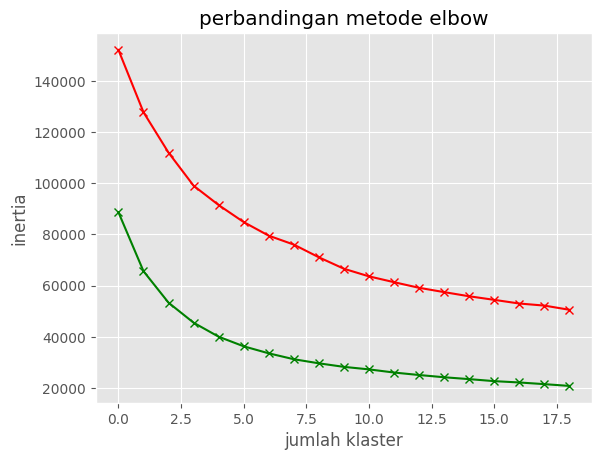

In [271]:
plt.plot(scores, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')
plt.title('perbandingan metode elbow')
plt.xlabel('jumlah klaster')
plt.ylabel('inertia')

dapat kita lihat bahwa metode elbow pada data yang direduksi dimensinya menggunakan Autoencoder menunjukkan "siku" yang lebih jelas pada jumlah klaster yang lebih sedikit dibandingkan dengan metode elbow pada data asli yang diskalakan

In [266]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(df_scaled)

In [267]:
df_cluster_dr = pd.concat([df, pd.DataFrame({'cluster': labels})], axis=1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [268]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.438560,0.123890
1,-0.752456,1.484678
2,-1.190305,-1.252732
3,-0.556700,0.960105
4,-1.979666,-0.215824


In [269]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.438560,0.123890,0
1,-0.752456,1.484678,0
2,-1.190305,-1.252732,0
3,-0.556700,0.960105,0
4,-1.979666,-0.215824,0


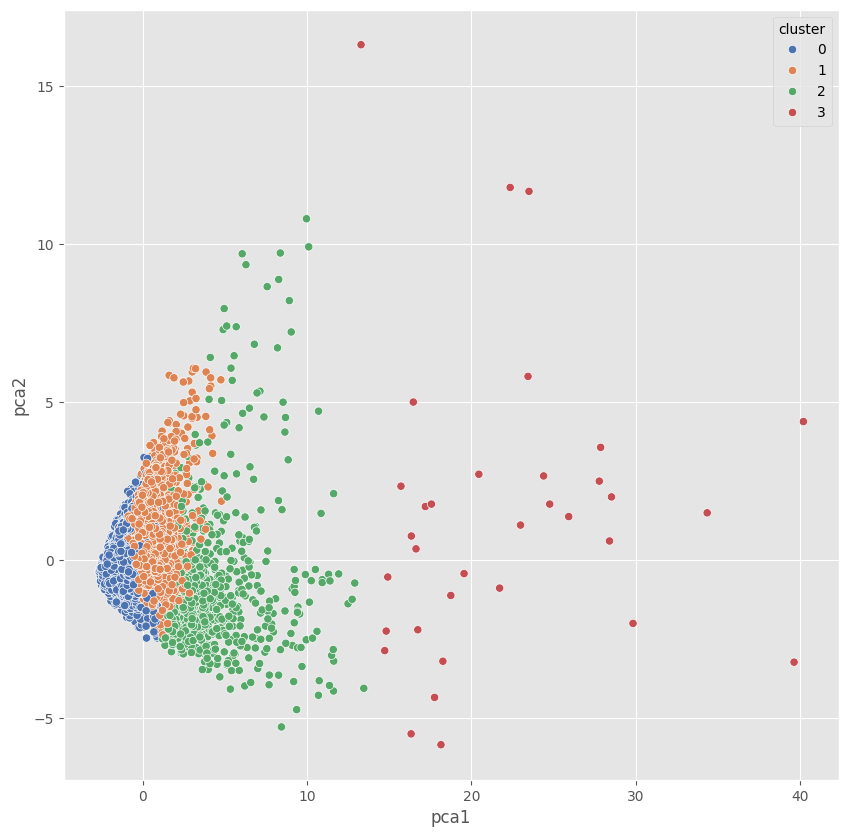

In [270]:
# visualisasi
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette='deep')
plt.show()

Berdasarkan 4 klaster yang dihasilkan setelah menerapkan KMeans pada data yang direduksi dimensinya menggunakan Autoencoder, berikut adalah kesimpulan mengenai karakteristik masing-masing klaster:

*   **Klaster 0:** Klaster ini tampaknya merupakan kelompok pelanggan dengan aktivitas pembelian yang rendah, baik pembelian satu kali maupun cicilan. Mereka juga cenderung memiliki saldo dan frekuensi saldo yang rendah. Penggunaan uang muka tunai (cash advance) juga relatif rendah di klaster ini.
*   **Klaster 1:** Kelompok ini menunjukkan frekuensi pembelian yang tinggi, terutama dalam bentuk cicilan. Mereka memiliki saldo dan limit kredit yang moderat. Pembayaran minimum cenderung lebih tinggi dibandingkan klaster 0.
*   **Klaster 2:** Klaster ini ditandai dengan pembelian satu kali (oneoff purchases) yang tinggi. Mereka juga memiliki saldo dan limit kredit yang tinggi. Frekuensi pembelian dan pembayaran cenderung tinggi.
*   **Klaster 3:** Kelompok ini memiliki penggunaan uang muka tunai (cash advance) yang sangat tinggi, baik dari segi jumlah maupun frekuensi transaksi. Saldo mereka juga cenderung tinggi, namun frekuensi pembelian dan frekuensi pembayaran cicilan mereka rendah.

Secara umum, keempat klaster ini tampaknya membedakan pelanggan berdasarkan pola pengeluaran mereka (pembelian satu kali vs cicilan vs uang muka tunai) serta tingkat penggunaan layanan kredit mereka.